In [ ]:
#CAMARA Diadié


""" https://www.unb.ca/cic/datasets/dns-exf-2021.html"""
"""The description :
We are releasing CIC-Bell-DNS-EXF-2021, a large dataset of 270.8 MB DNS traffic generated by exfiltrating various file types ranging from small to large sizes.
We leverage our developed feature extractor to extract 30 features from the DNS packets, resulting in a final structured dataset of 323,698 heavy attack samples,
53,978 light attack samples, and 641,642 distinct benign samples.
The experimental analysis of utilizing several Machine Learning (ML) algorithms on our dataset shows the effectiveness of our hybrid detection system even in the existence of light DNS traffic."""

""" We used this link too directly have the aggregated data rather than need to aggregated all the many CSV files"""
"""https://www.kaggle.com/code/dhoogla/cic-bell-dnsexf2021-00-aggregation/notebook"""
"""
Step 2 :
1. Descriptive analysis of your data.
2. Implementation of the necessary pre-processing.
3. Formalisation of the problem.
4. Selection of a baseline model and implementation of the model.
"""

'\nStep 2 :\n1. Descriptive analysis of your data.\n2. Implementation of the necessary pre-processing.\n3. Formalisation of the problem.\n4. Selection of a baseline model and implementation of the model.\n'

In [ ]:
# 1 Description of the data
# The following code will only execute
# successfully when compression is complete

# So complicated to directly import with csv k
"""
https://drive.google.com/file/d/1dTmkbkiG60liBK1WS61SOk8p63nPtd9A/view?usp=drive_link benign
https://drive.google.com/file/d/1xxj7U0k90LrU8jv7gE-YHQQwa9i7Bn10/view?usp=drive_link Heavy
https://drive.google.com/file/d/1xqiYHzENrfa3hcVDcp7WCzTpe6ioXCA5/view?usp=drive_link Light
"""

# We need to describe what each columns mean to explain if we keep them or not

'\nhttps://drive.google.com/file/d/1dTmkbkiG60liBK1WS61SOk8p63nPtd9A/view?usp=drive_link benign\nhttps://drive.google.com/file/d/1xxj7U0k90LrU8jv7gE-YHQQwa9i7Bn10/view?usp=drive_link Heavy\nhttps://drive.google.com/file/d/1xqiYHzENrfa3hcVDcp7WCzTpe6ioXCA5/view?usp=drive_link Light\n'

In [ ]:
# To be able to fully inspect everything with head :
import pandas as pd

# Show all columns in display
pd.set_option('display.max_columns', None)

# Show all content in each column
pd.set_option('display.max_colwidth', None)

# Optionally show all rows (careful with huge datasets)




In [ ]:
import pandas as pd
import gdown

# Step 1: File IDs from your Google Drive links
file_ids = {
    "benign": "1dTmkbkiG60liBK1WS61SOk8p63nPtd9A",
    "Heavy":  "1xxj7U0k90LrU8jv7gE-YHQQwa9i7Bn10",
    "Light":  "1xqiYHzENrfa3hcVDcp7WCzTpe6ioXCA5"
}

# Step 2: Download files (direct download)
local_paths = {}
for name, fid in file_ids.items():
    output_path = f"{name}.dat"
    gdown.download(f"https://drive.google.com/uc?id={fid}", output_path, quiet=False)
    local_paths[name] = output_path
dfs = {}
for name, path in local_paths.items():
    try:

        dfs[name] = pd.read_parquet(path, engine='pyarrow')
        print(f"Loaded {name} as Parquet, shape: {dfs[name].shape}")
    except Exception as e:
        dfs[name] = pd.read_csv(path)
        print(f"Loaded {name} as CSV, shape: {dfs[name].shape}")


df_benign = dfs['benign']
df_heavy  = dfs['Heavy']
df_light  = dfs['Light']


print(df_benign.head())

Downloading...
From: https://drive.google.com/uc?id=1dTmkbkiG60liBK1WS61SOk8p63nPtd9A
To: /content/benign.dat
100%|██████████| 8.14M/8.14M [00:00<00:00, 61.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xxj7U0k90LrU8jv7gE-YHQQwa9i7Bn10
To: /content/Heavy.dat
100%|██████████| 11.5M/11.5M [00:00<00:00, 80.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xqiYHzENrfa3hcVDcp7WCzTpe6ioXCA5
To: /content/Light.dat
100%|██████████| 3.20M/3.20M [00:00<00:00, 107MB/s]


Loaded benign as Parquet, shape: (221073, 44)
Loaded Heavy as Parquet, shape: (433364, 44)
Loaded Light as Parquet, shape: (102774, 44)
    rr  A_frequency  NS_frequency  CNAME_frequency  SOA_frequency  \
0  0.0          0.0           0.0              0.0            0.0   
1  0.0          0.0           0.0              0.0            0.0   
2  0.0          0.0           0.0              0.0            0.0   
3  0.0          0.0           0.0              0.0            0.0   
4  0.0          0.0           0.0              0.0            0.0   

   NULL_frequency  PTR_frequency  HINFO_frequency  MX_frequency  \
0             0.0            6.0              0.0           0.0   
1             0.0            8.0              0.0           0.0   
2             0.0           10.0              0.0           0.0   
3             0.0            6.0              0.0           0.0   
4             0.0            3.0              0.0           0.0   

   TXT_frequency  AAAA_frequency  SRV_frequenc

In [ ]:
# As we have a correct data set we can start the analysis (first we will try to see if we can fuse directyly the 3 dataset)

print(df_benign.columns)
print(df_heavy.columns)
print(df_light.columns)

Index(['rr', 'A_frequency', 'NS_frequency', 'CNAME_frequency', 'SOA_frequency',
       'NULL_frequency', 'PTR_frequency', 'HINFO_frequency', 'MX_frequency',
       'TXT_frequency', 'AAAA_frequency', 'SRV_frequency', 'OPT_frequency',
       'rr_type', 'rr_count', 'rr_name_entropy', 'rr_name_length',
       'distinct_ns', 'distinct_ip', 'unique_country', 'unique_asn',
       'distinct_domains', 'reverse_dns', 'a_records', 'unique_ttl',
       'ttl_mean', 'ttl_variance', 'timestamp', 'FQDN_count',
       'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special',
       'labels', 'labels_max', 'labels_average', 'longest_word', 'sld', 'len',
       'subdomain', 'GlobalClass', 'SubClass'],
      dtype='object')
Index(['rr', 'A_frequency', 'NS_frequency', 'CNAME_frequency', 'SOA_frequency',
       'NULL_frequency', 'PTR_frequency', 'HINFO_frequency', 'MX_frequency',
       'TXT_frequency', 'AAAA_frequency', 'SRV_frequency', 'OPT_frequency',
       'rr_type', 'rr_count', 'rr_name_e

In [ ]:
# The result is yes they have the exact same columns so we can fuse the mdirectly
df_all = pd.concat([df_benign, df_heavy, df_light], ignore_index=True)
print("Shape of merged dataset:", df_all.shape)
print("Class distribution:\n", df_all['GlobalClass'].value_counts())
print("Column types:\n", df_all.dtypes)
print("First row preview:\n", df_all.iloc[[0]])

Shape of merged dataset: (757211, 44)
Class distribution:
 GlobalClass
Heavy Attack    251670
Benign          221073
Heavy Benign    181694
Light Benign     60091
Light Attack     42683
Name: count, dtype: int64
Column types:
 rr                   float32
A_frequency          float32
NS_frequency         float32
CNAME_frequency      float32
SOA_frequency        float32
NULL_frequency       float32
PTR_frequency        float32
HINFO_frequency      float32
MX_frequency         float32
TXT_frequency        float32
AAAA_frequency       float32
SRV_frequency        float32
OPT_frequency        float32
rr_type               object
rr_count             float32
rr_name_entropy      float32
rr_name_length       float32
distinct_ns          float32
distinct_ip         category
unique_country        object
unique_asn            object
distinct_domains      object
reverse_dns           object
a_records            float32
unique_ttl            object
ttl_mean             float32
ttl_variance       

## Descriptive statistics and data info


In [ ]:
display(df_all.describe())
display(df_all.info())

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,AAAA_frequency,SRV_frequency,OPT_frequency,rr_count,rr_name_entropy,rr_name_length,distinct_ns,a_records,ttl_mean,ttl_variance,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain
count,262105.000000,262105.000000,262105.0,262105.0,262105.0,262105.0,262105.000000,262105.0,262105.0,262105.000000,262105.000000,262105.0,262105.0,262105.000000,262105.000000,262105.000000,262105.000000,262105.0,262105.000000,262105.000000,757211.000000,757211.000000,757211.000000,757211.000000,757211.000000,757211.000000,757211.000000,757211.000000,757211.000000,757211.000000,757211.000000,757211.000000
mean,1.059619,1.059613,0.0,0.0,0.0,0.0,1.740028,0.0,0.0,0.000019,0.000023,0.0,0.0,0.398585,2.879194,20.052158,0.257839,0.0,66.921028,2.385762,21.209139,5.446479,0.740263,10.577114,5.734658,2.481558,4.157104,4.503103,8.225188,4.830909,12.261901,0.698735
std,1.352630,1.352624,0.0,0.0,0.0,0.0,2.424984,0.0,0.0,0.004368,0.006766,0.0,0.0,0.711441,0.389698,6.748880,0.444972,0.0,66.384995,4.423527,6.499343,4.056687,4.629320,3.369030,4.699701,0.427004,2.297475,1.868668,4.313897,4.321463,4.228035,0.458808
min,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.693120,2.000000,0.000000,0.0,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,1.500000,2.000000,0.000000
25%,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.621794,14.000000,0.000000,0.0,1.000000,0.000000,15.000000,0.000000,0.000000,10.000000,0.000000,2.054029,2.000000,2.000000,7.000000,3.166667,11.000000,0.000000
50%,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,3.102731,24.000000,0.000000,0.0,122.000000,0.000000,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000
75%,2.000000,2.000000,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,3.200225,26.000000,1.000000,0.0,125.000000,9.000000,26.000000,9.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.666667,14.000000,1.000000
max,12.000000,12.000000,0.0,0.0,0.0,0.0,18.000000,0.0,0.0,1.000000,2.000000,0.0,0.0,6.000000,3.570534,36.000000,3.000000,0.0,255.000000,1003.102051,36.000000,29.000000,32.000000,34.000000,14.000000,4.368167,8.000000,7.000000,32.000000,32.000000,35.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757211 entries, 0 to 757210
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   rr                262105 non-null  float32 
 1   A_frequency       262105 non-null  float32 
 2   NS_frequency      262105 non-null  float32 
 3   CNAME_frequency   262105 non-null  float32 
 4   SOA_frequency     262105 non-null  float32 
 5   NULL_frequency    262105 non-null  float32 
 6   PTR_frequency     262105 non-null  float32 
 7   HINFO_frequency   262105 non-null  float32 
 8   MX_frequency      262105 non-null  float32 
 9   TXT_frequency     262105 non-null  float32 
 10  AAAA_frequency    262105 non-null  float32 
 11  SRV_frequency     262105 non-null  float32 
 12  OPT_frequency     262105 non-null  float32 
 13  rr_type           262105 non-null  object  
 14  rr_count          262105 non-null  float32 
 15  rr_name_entropy   262105 non-null  float32 
 16  rr

None

**Reasoning**:
Examine the unique values and their counts in the specified categorical columns to understand their distributions and potential usefulness.



In [ ]:
# Here we will count the number of unique values in each categorical column
# to understand the diversity of categories and adapt the processing accordingly.
categorical_columns = [
    'GlobalClass', 'SubClass', 'rr_type', 'distinct_ip', 'unique_country',
    'unique_asn', 'distinct_domains', 'reverse_dns', 'unique_ttl',
    'longest_word', 'sld'
]

for col in categorical_columns:
    print(f"--- Column: {col} ---")
    unique_count = df_all[col].nunique()
    print(f"Number of unique values: {unique_count}")

    if unique_count > 20:
        print(f"Column '{col}' has a large number of unique values. Showing top 5 most frequent:")
        print(df_all[col].value_counts().head(5))
    else:
        print("Value counts:")
        print(df_all[col].value_counts())
    print("\n")

--- Column: GlobalClass ---
Number of unique values: 5
Value counts:
GlobalClass
Heavy Attack    251670
Benign          221073
Heavy Benign    181694
Light Benign     60091
Light Attack     42683
Name: count, dtype: int64


--- Column: SubClass ---
Number of unique values: 15
Value counts:
SubClass
-                          221073
Heavy Benign 3             181694
Heavy Attack text           71102
Light Benign -              60091
Heavy Attack video          38012
Heavy Attack image          36386
Heavy Attack audio          35795
Heavy Attack compressed     35746
Heavy Attack exe            34629
Light Attack audio          17618
Light Attack compressed     10241
Light Attack exe             6450
Light Attack video           4371
Light Attack text            3479
Light Attack image            524
Name: count, dtype: int64


--- Column: rr_type ---
Number of unique values: 6
Value counts:
rr_type
{'A'}            127700
{'PTR'}          127073
{None}             4646
set()            

## Visualize data distributions

We create visualizations (e.g., histograms, box plots) for numerical features to understand their distributions and identify potential outliers.


Visualizing column: A_frequency


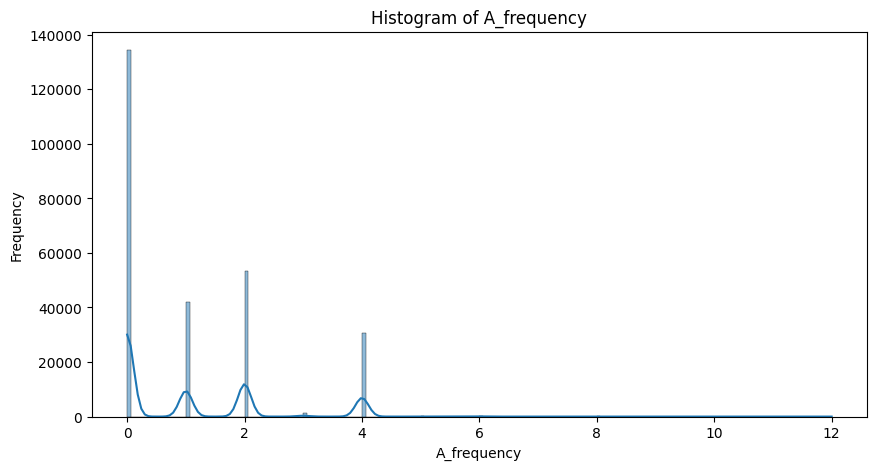

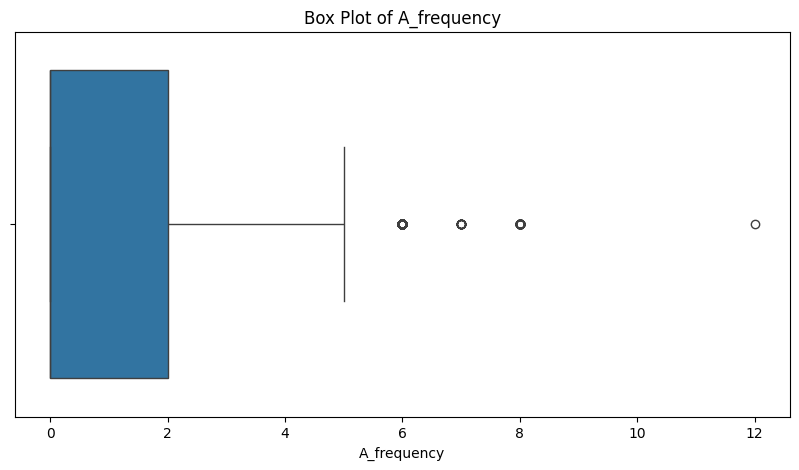

Visualizing column: NS_frequency


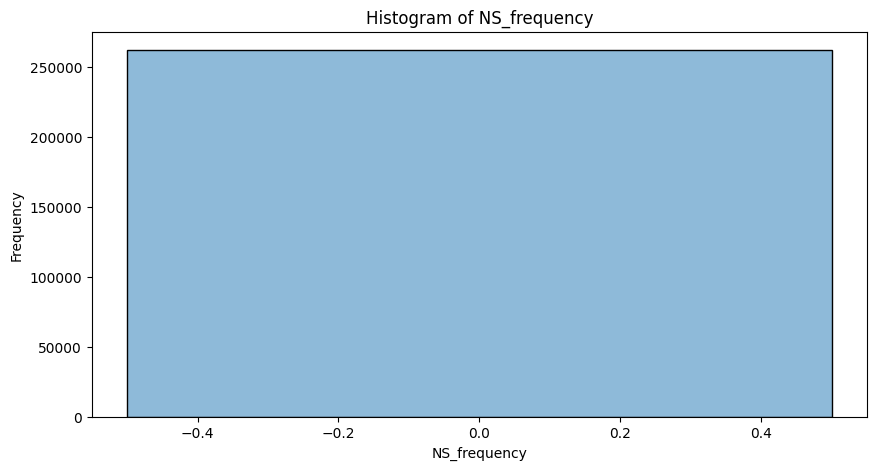

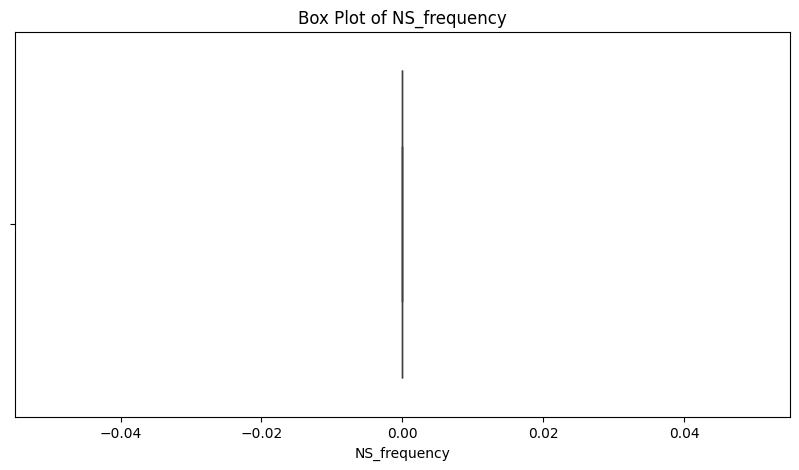

Visualizing column: CNAME_frequency


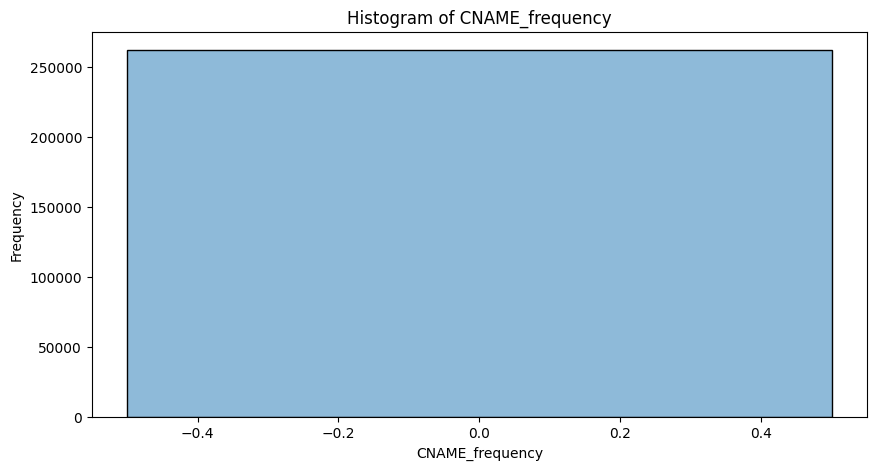

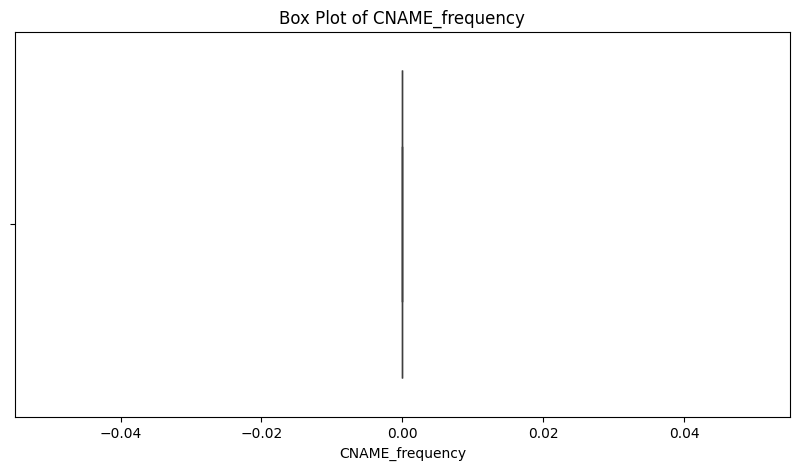

Visualizing column: SOA_frequency


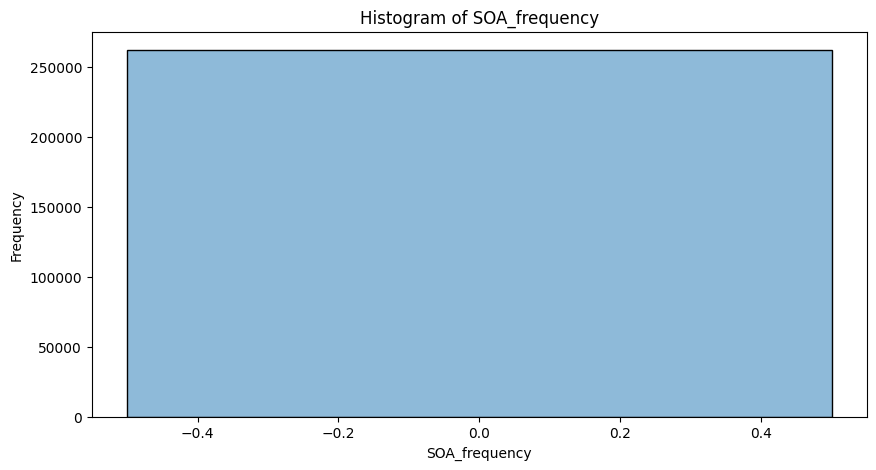

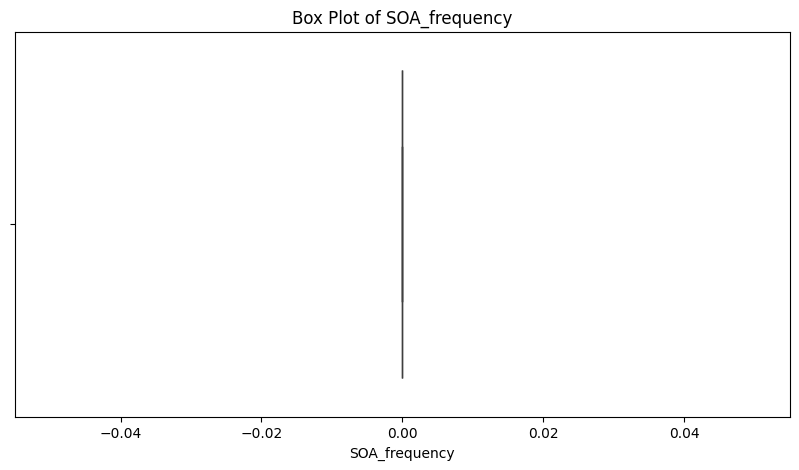

Visualizing column: NULL_frequency


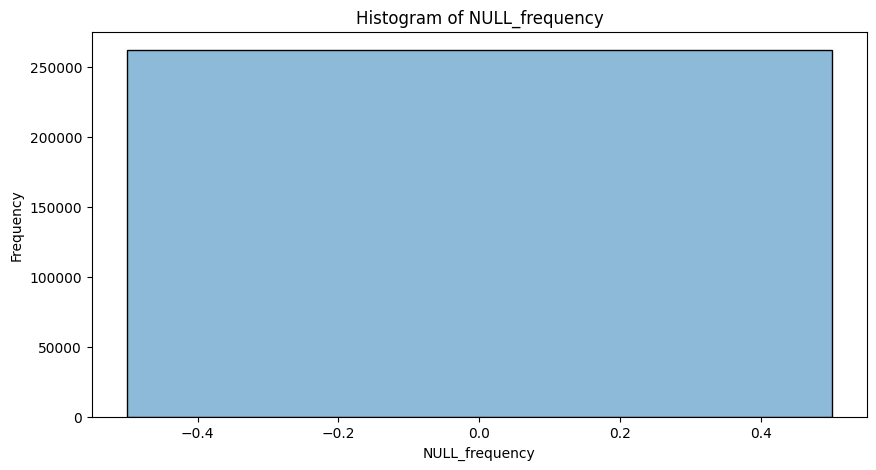

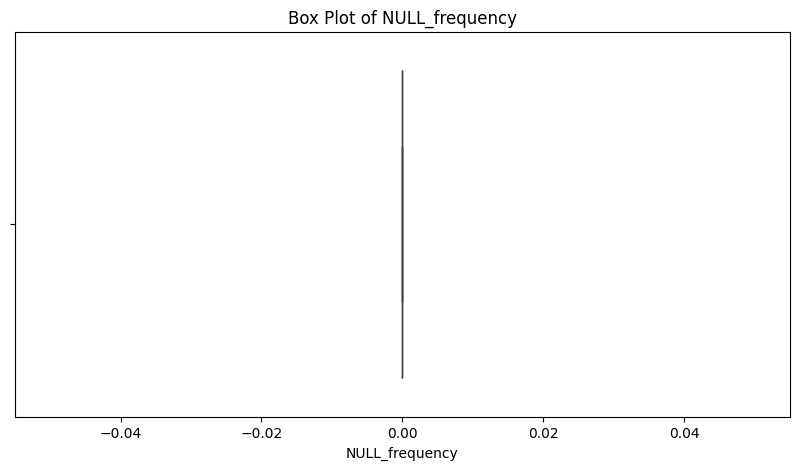

Visualizing column: PTR_frequency


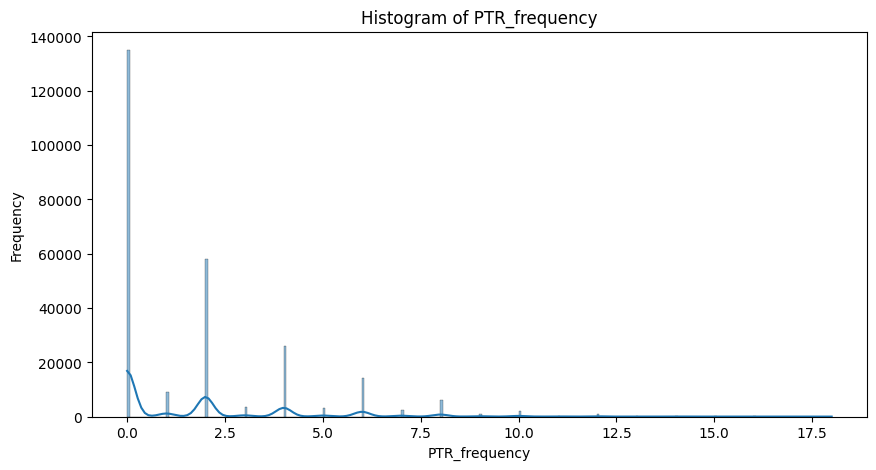

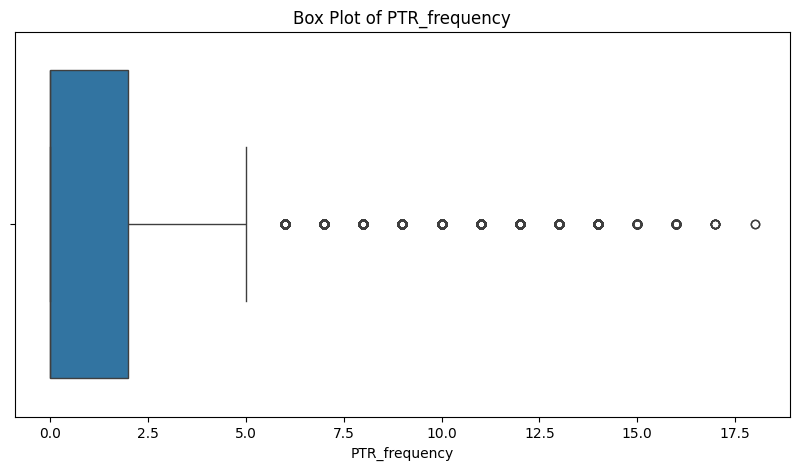

Visualizing column: HINFO_frequency


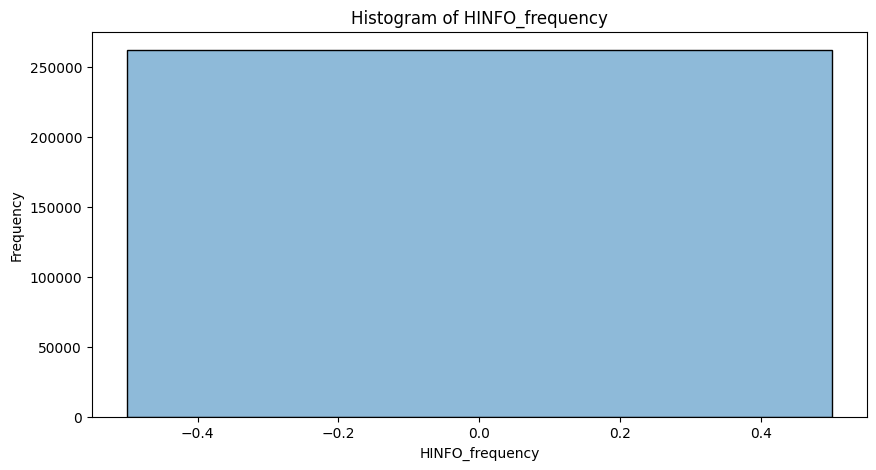

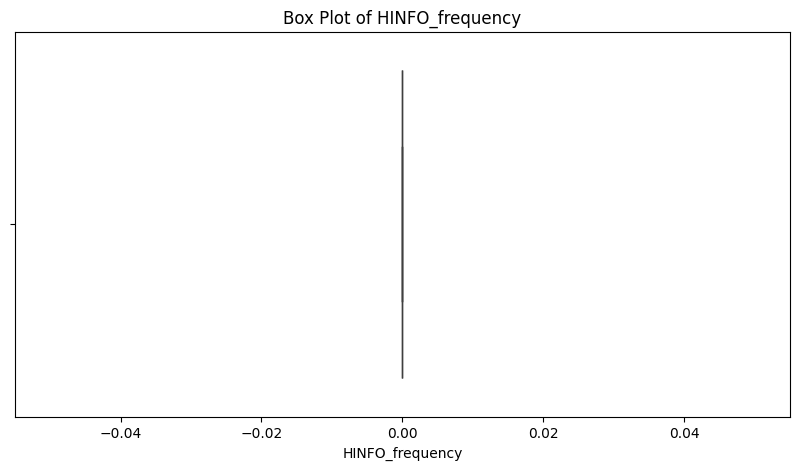

Visualizing column: MX_frequency


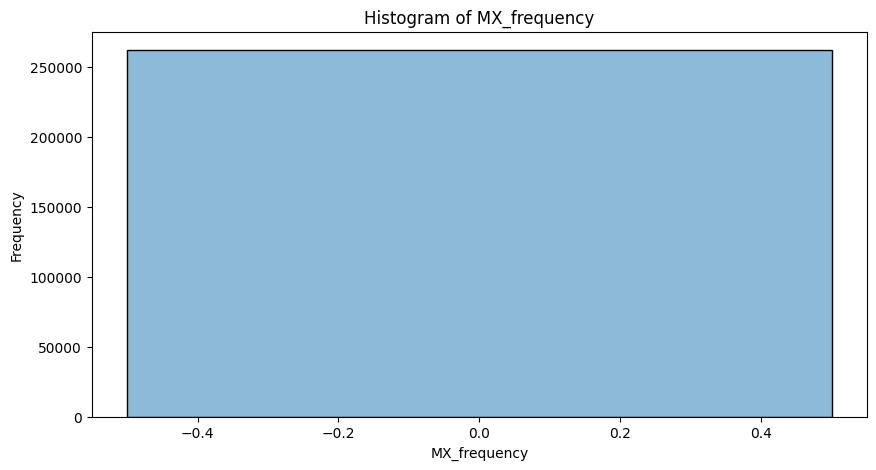

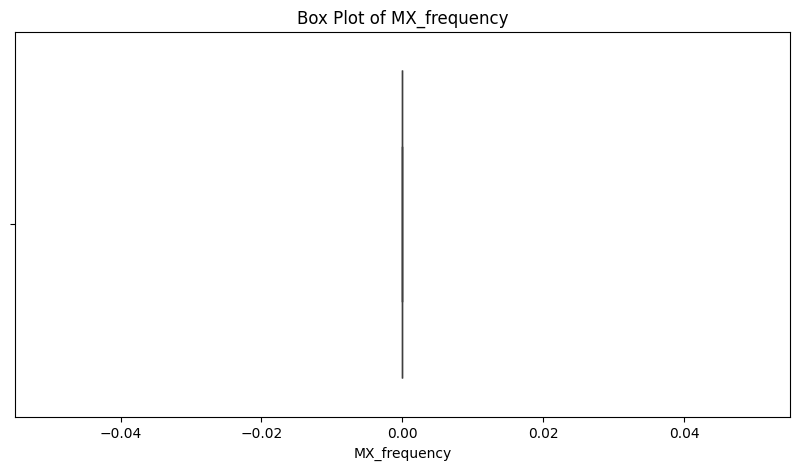

Visualizing column: TXT_frequency


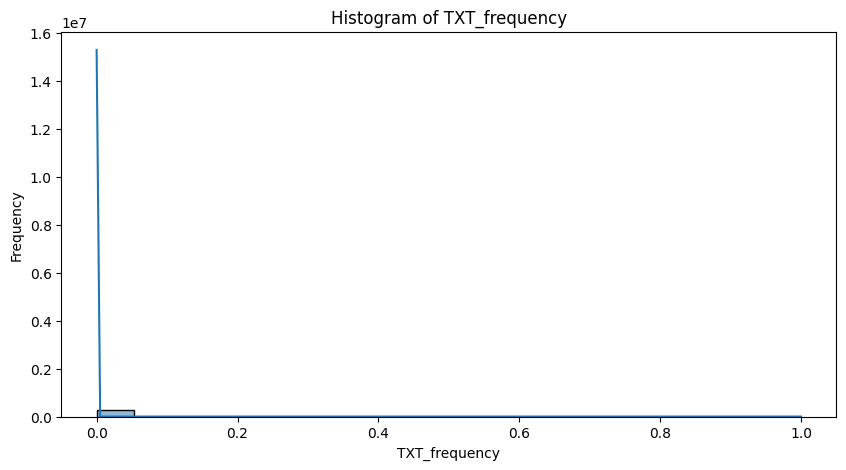

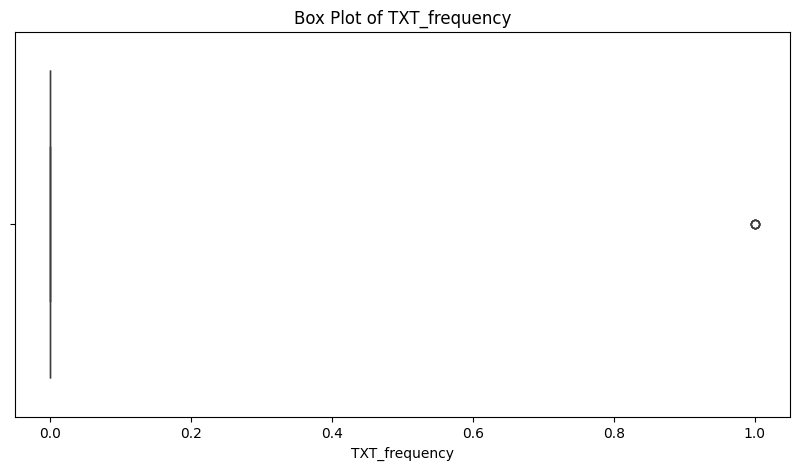

Visualizing column: AAAA_frequency


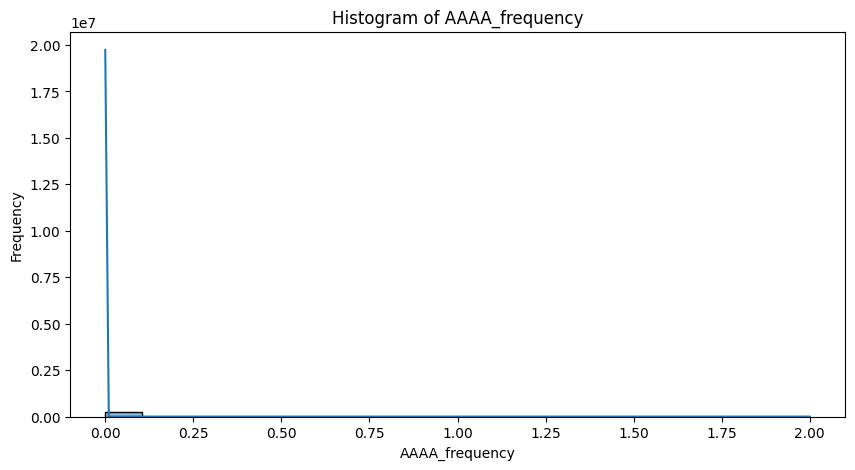

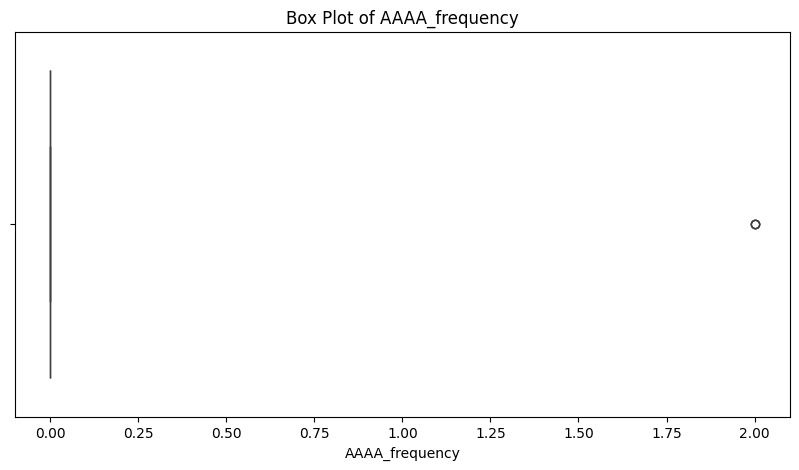

Visualizing column: SRV_frequency


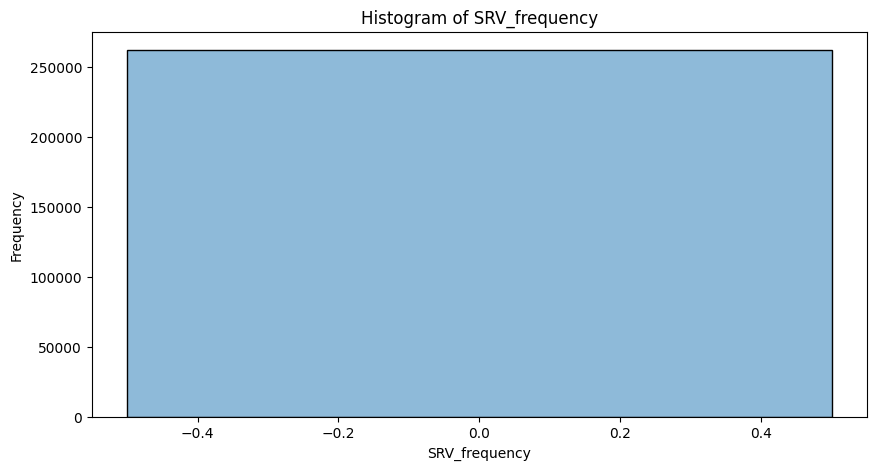

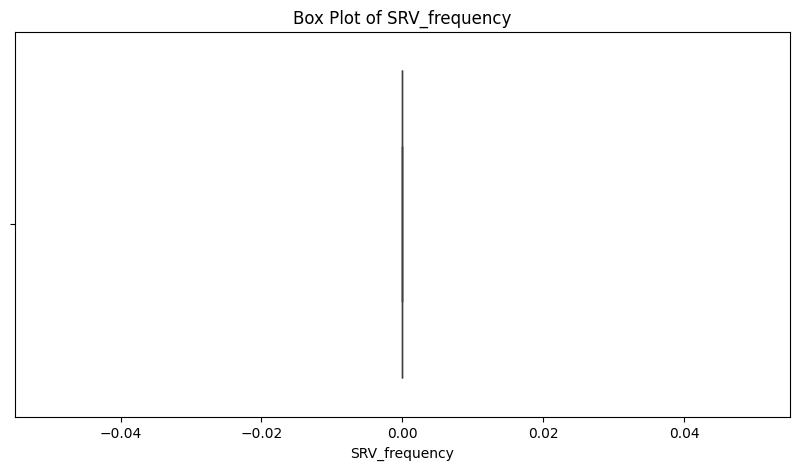

Visualizing column: OPT_frequency


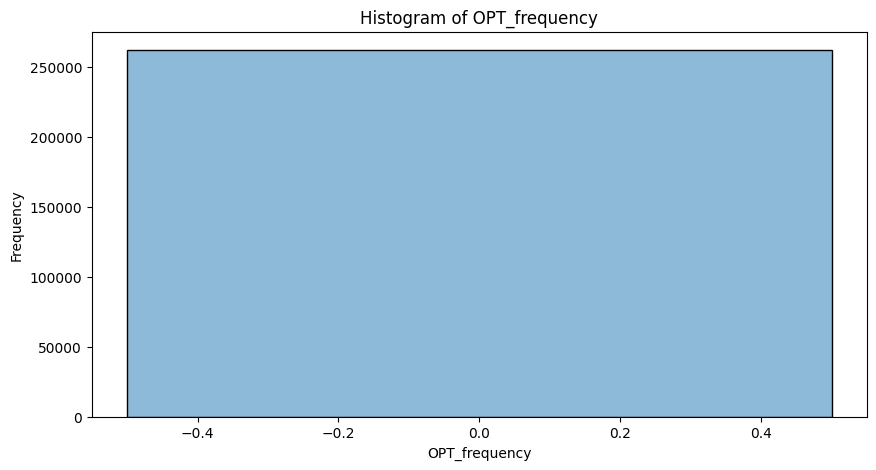

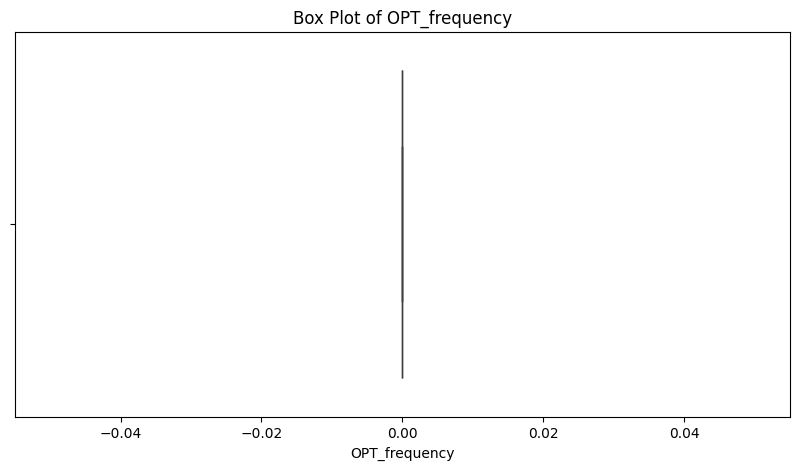

Visualizing column: rr_name_entropy


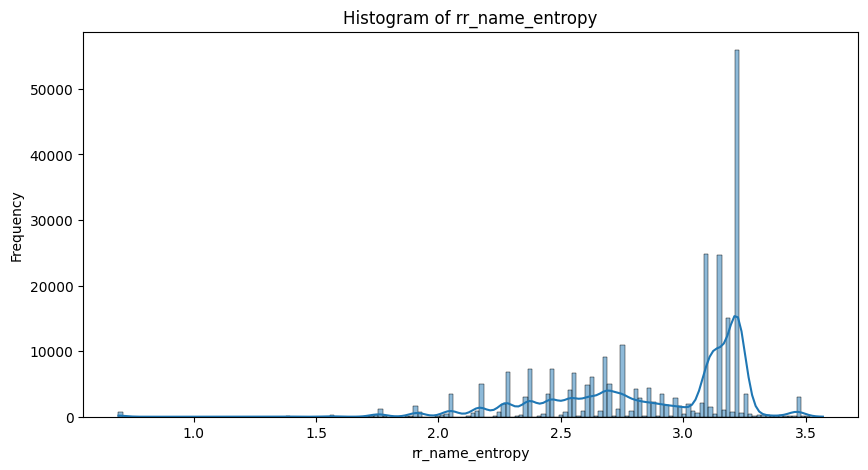

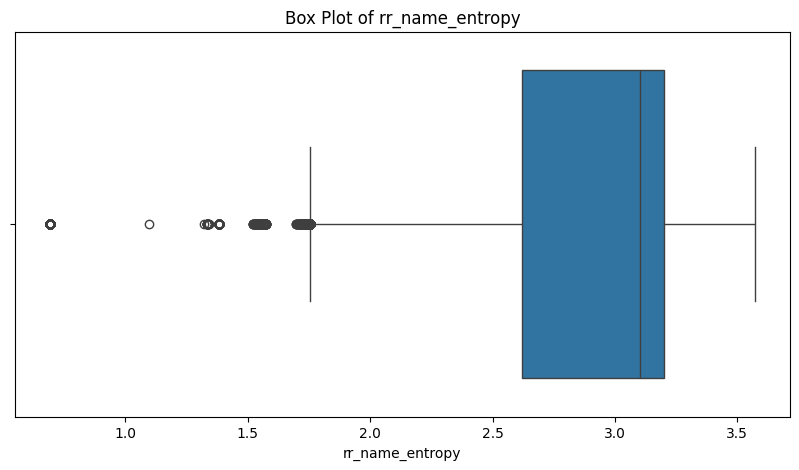

Visualizing column: rr_name_length


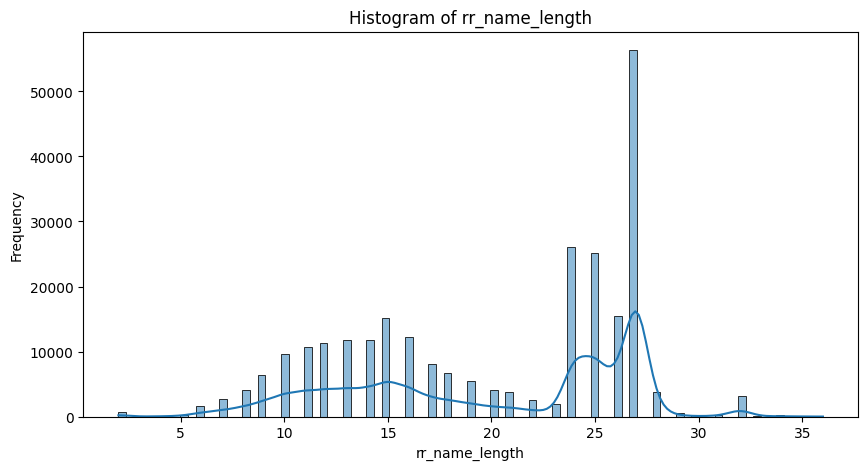

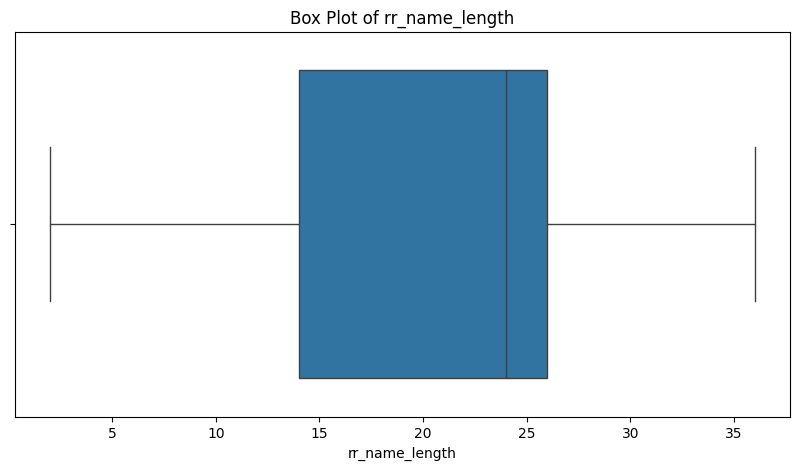

Visualizing column: distinct_ns


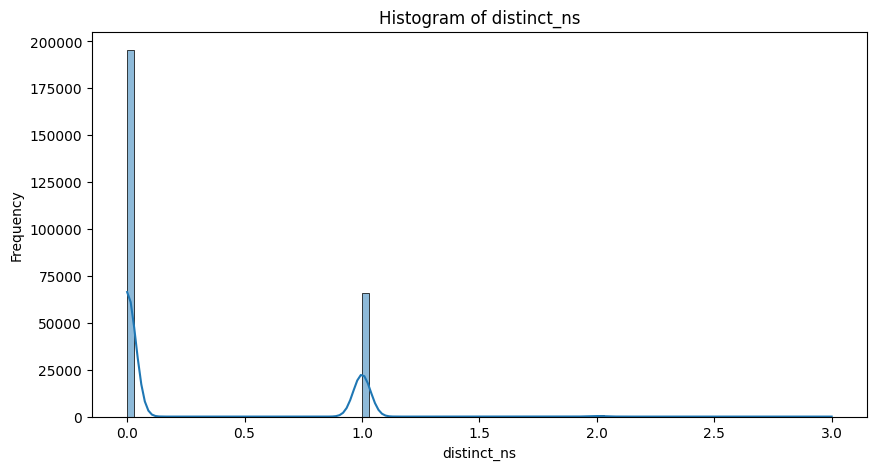

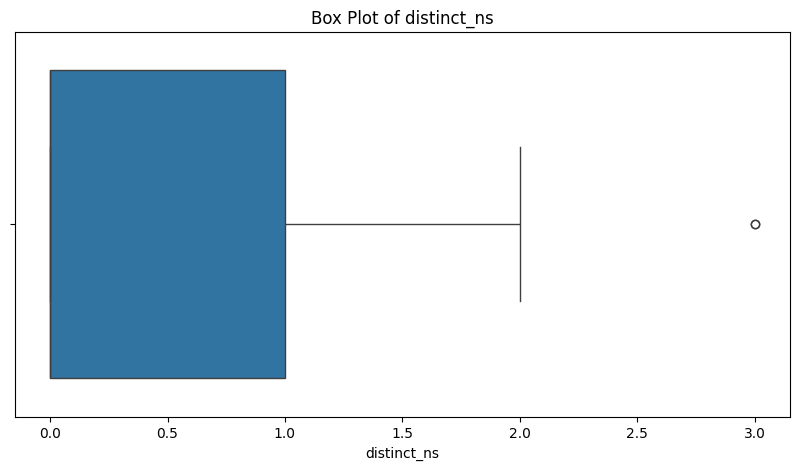

Visualizing column: ttl_mean


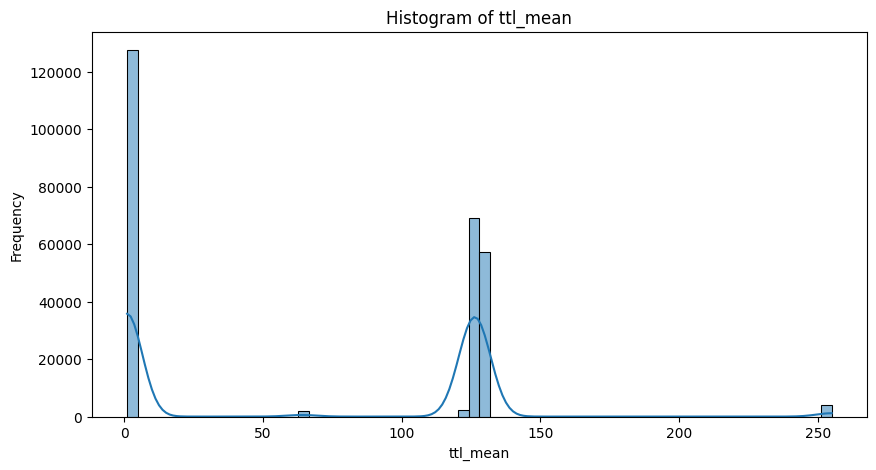

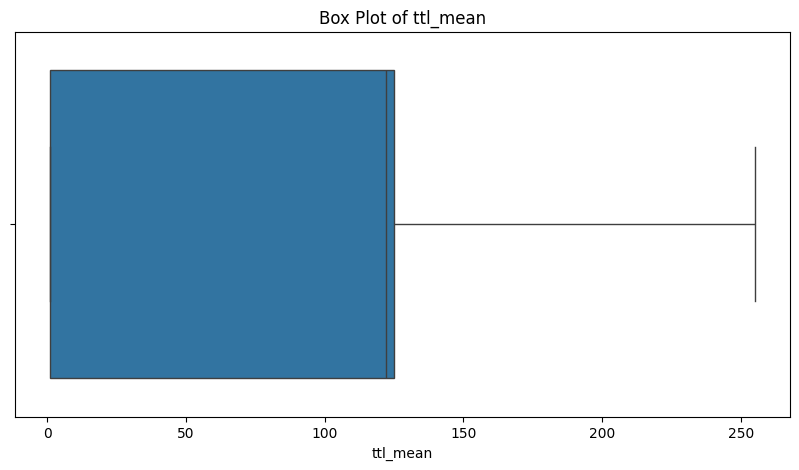

Visualizing column: ttl_variance


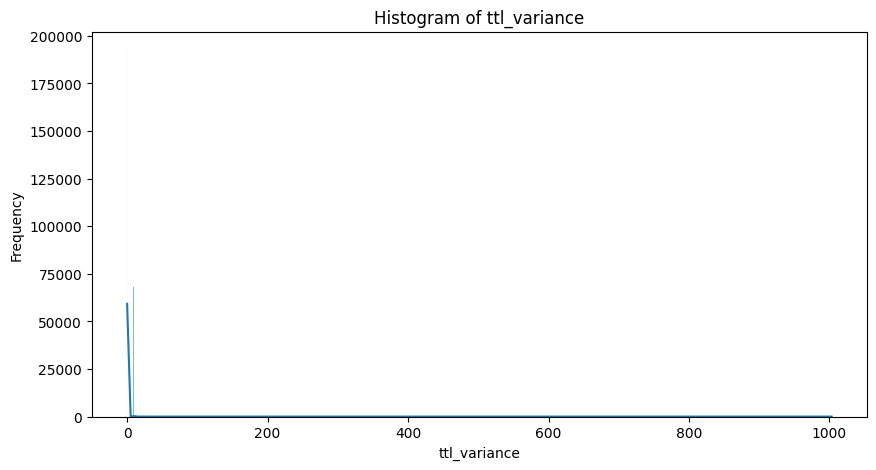

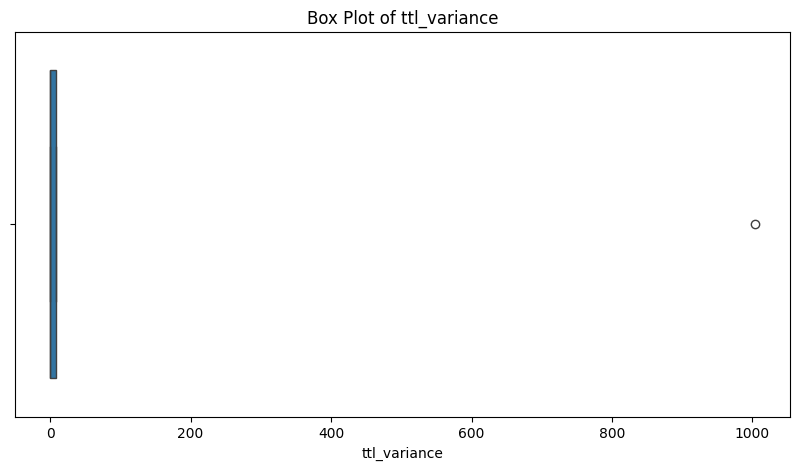

Visualizing column: entropy


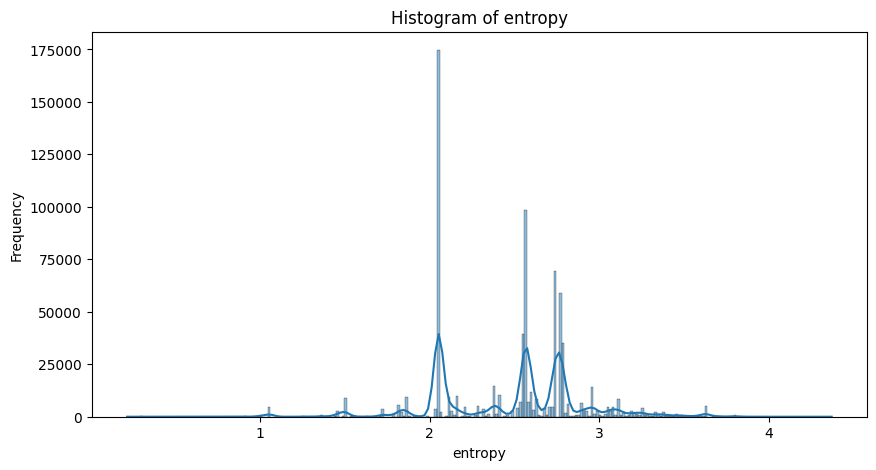

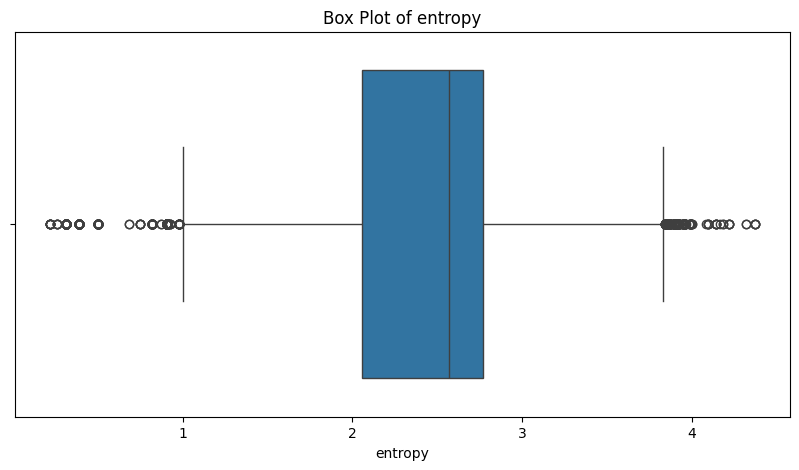

Visualizing column: labels_average


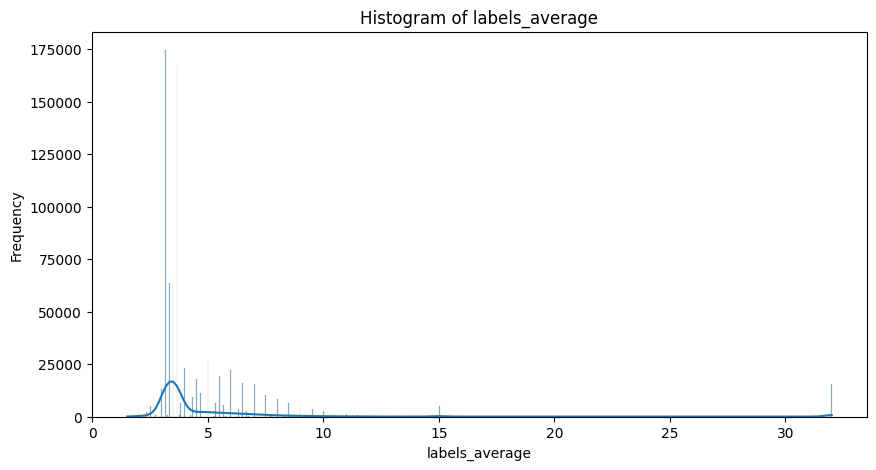

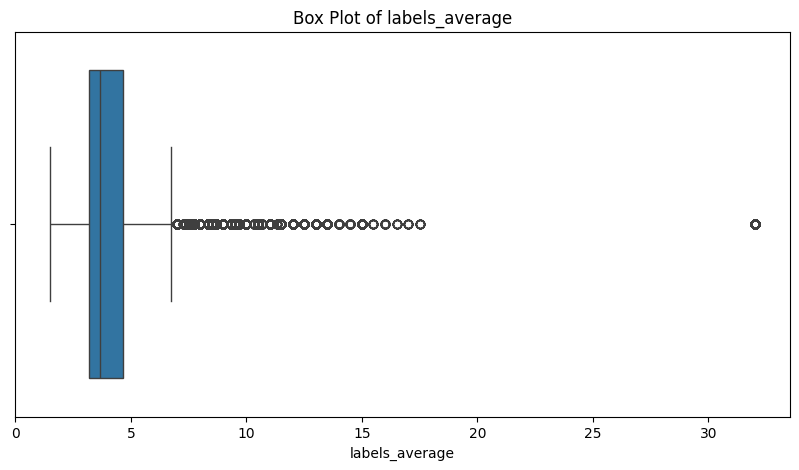

In [ ]:
# Here we will visualize the distribution of numerical variables and boxplots to identify extreme values or outliers
# to observe their distribution and detect atypical behaviors.
# or values that could influence the model's performance.

import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df_all.select_dtypes(include=['float32', 'int8']).columns

# Exclude 'FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'labels_max', 'len', 'subdomain' as they are int8 and represent counts/lengths, not typical numerical distributions
# Also exclude 'rr', 'rr_count', 'a_records' as they have many missing values as seen in describe()
columns_to_plot = [col for col in numerical_columns if col not in ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'labels_max', 'len', 'subdomain', 'rr', 'rr_count', 'a_records']]

for col in columns_to_plot:
    print(f"Visualizing column: {col}")

    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(df_all[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_all[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

## Analyze relationships

We explore relationships between features and the target variable (`GlobalClass`) using visualizations and statistical methods (e.g., correlation matrix for numerical features).



We are going to
Create a correlation matrix for the numerical features, visualize it with a heatmap, and then create visualizations to explore the relationship between selected features and the target variable 'GlobalClass'.



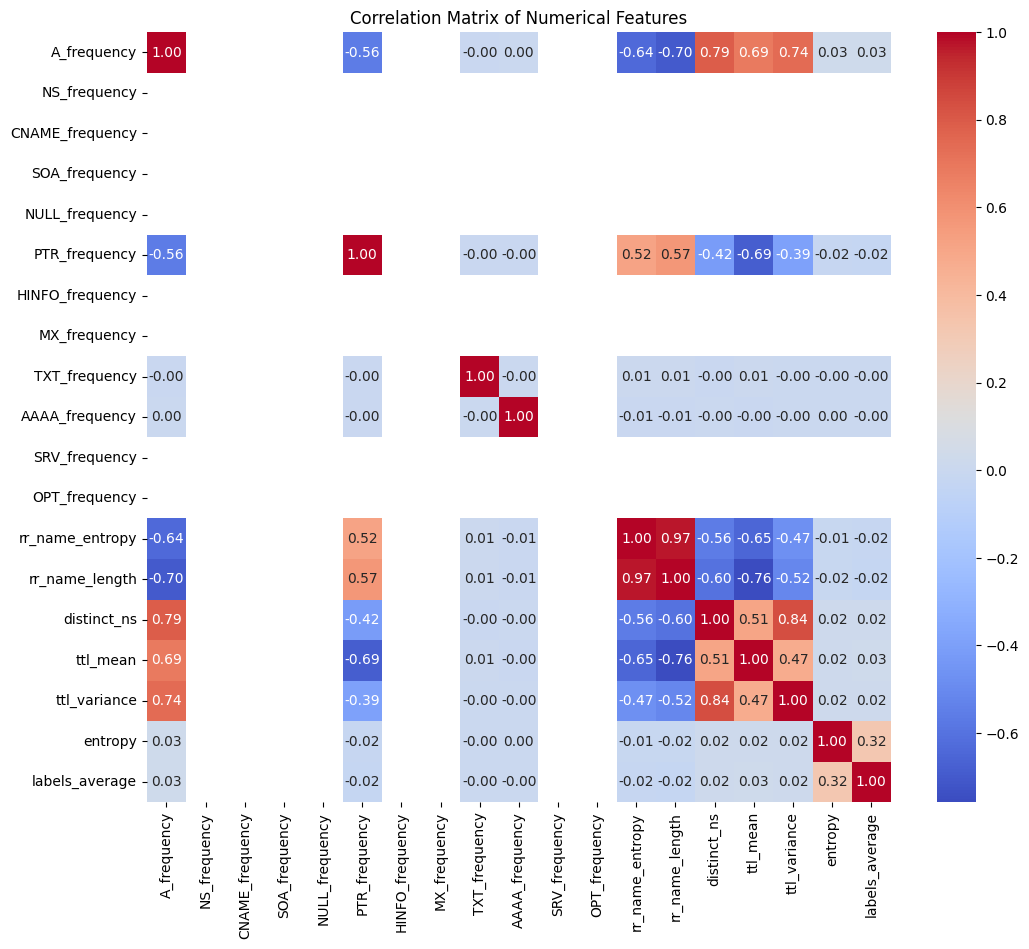

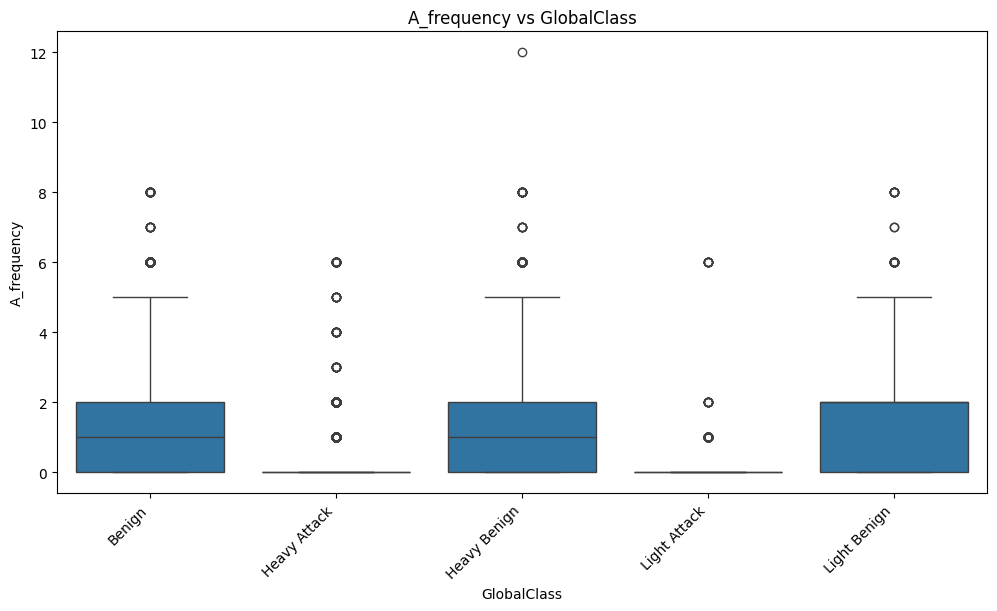

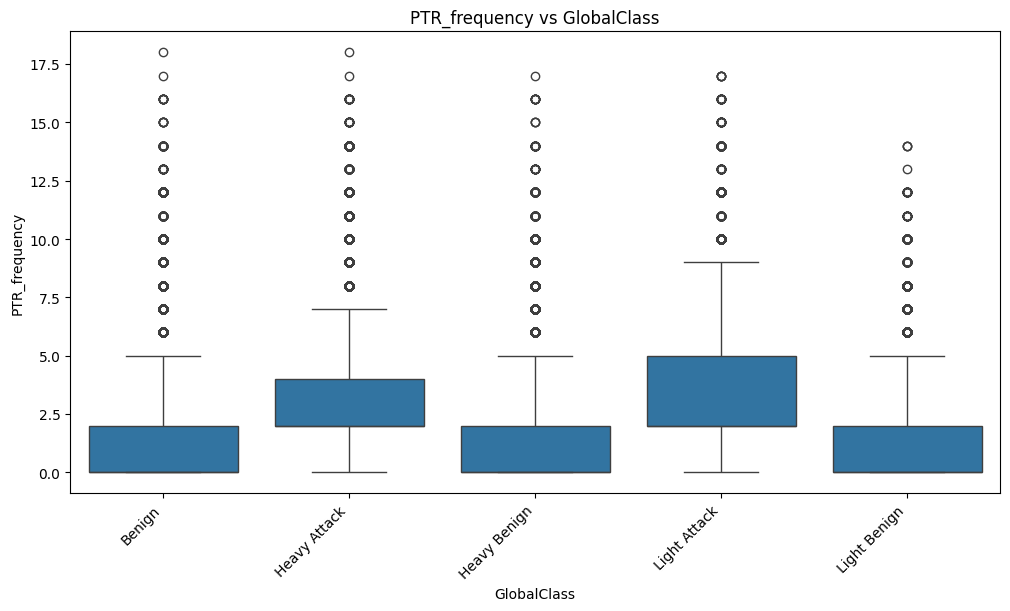

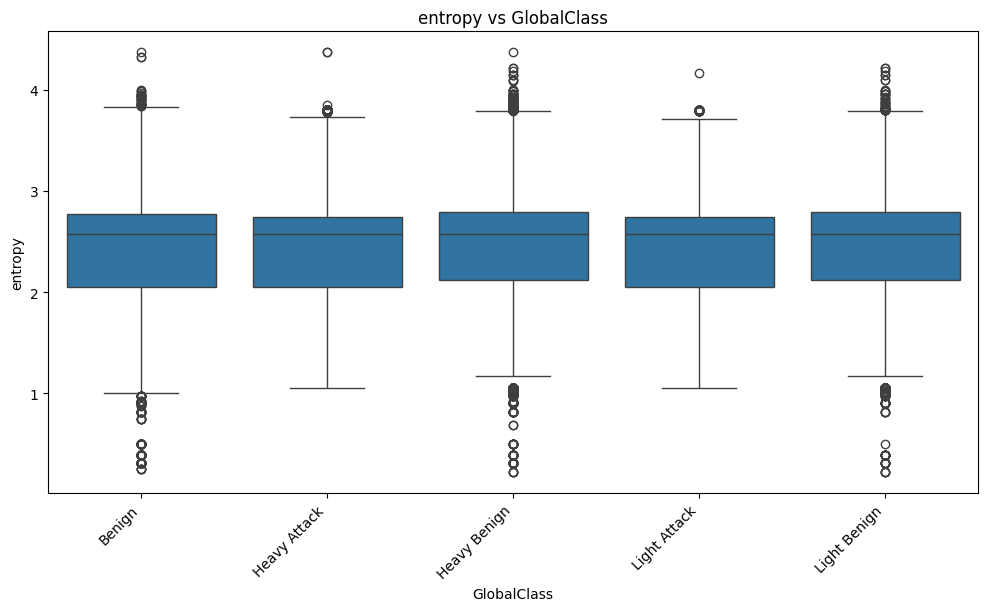

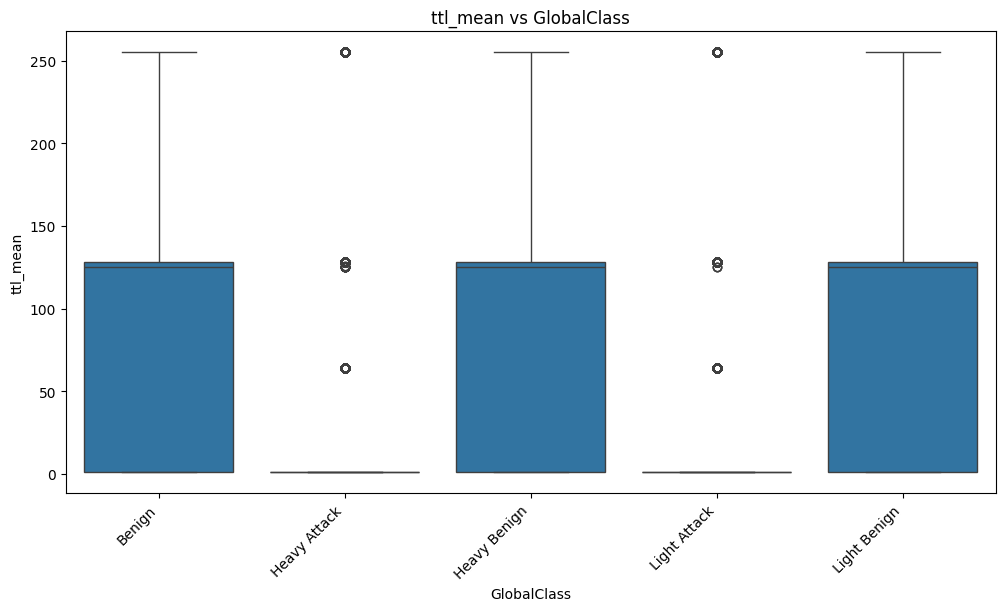

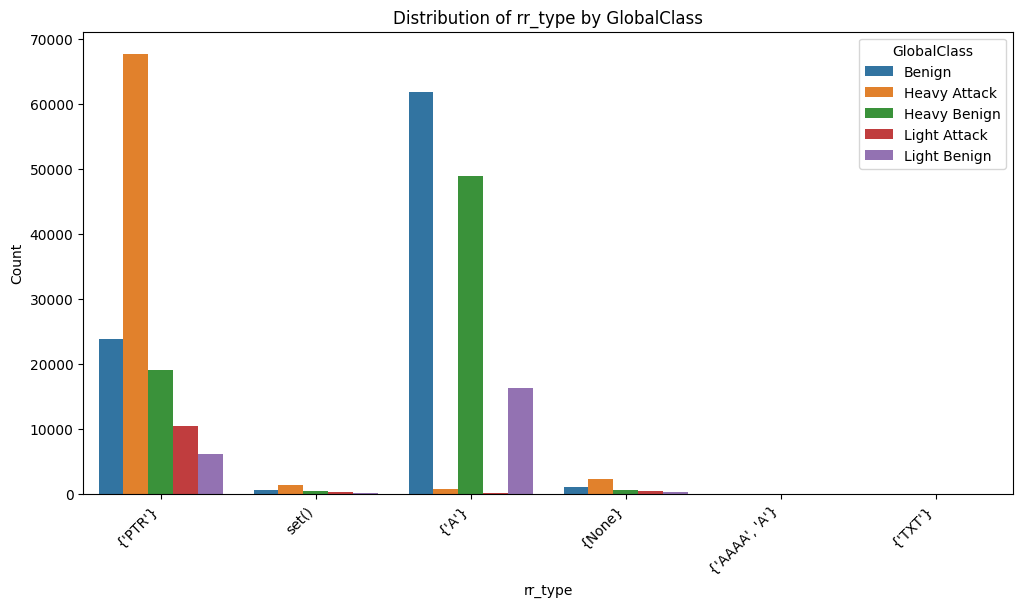

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns, excluding those with many missing values or that are counts/lengths
numerical_cols_for_corr = df_all.select_dtypes(include=['float32', 'int8']).columns
exclude_cols = ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'labels_max', 'len', 'subdomain', 'rr', 'rr_count', 'a_records']
numerical_cols_for_corr = [col for col in numerical_cols_for_corr if col not in exclude_cols]


# Calculate the correlation matrix for the selected numerical features
correlation_matrix = df_all[numerical_cols_for_corr].corr()

# Visualize the correlation matrix using a heatmap, but here the heatmap will not be perfect as we still have many featurein object type or not in the correct format for the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# We explore relationships between selected numerical features and GlobalClass
# Choose a few numerical features that might be interesting based on the correlation matrix or domain knowledge
features_to_plot = ['A_frequency', 'PTR_frequency', 'entropy', 'ttl_mean']

for col in features_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='GlobalClass', y=col, data=df_all)
    plt.title(f'{col} vs GlobalClass')
    plt.xlabel('GlobalClass')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.show()


categorical_features_to_plot = ['rr_type'] # Based on previous analysis, rr_type has few unique values

for col in categorical_features_to_plot:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='GlobalClass', data=df_all)
    plt.title(f'Distribution of {col} by GlobalClass')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='GlobalClass')
    plt.show()

## Explaininng of columns and assess relevance





To understand better the columns we are going to explain them based on the source  and we will see if we are going to keep them or not based on their relevance



| Column               | Explanation                                           | Relevance for Classification                                          | Decision                                                |
| -------------------- | ----------------------------------------------------- | --------------------------------------------------------------------- | ------------------------------------------------------- |
| **rr**               | Rate of response per second.                          | Attack traffic might have different response rates.                   | Keep (handle missing values)                            |
| **A_frequency**      | Frequency of A records.                               | Can indicate unusual DNS traffic patterns.                            | Keep                                                    |
| **NS_frequency**     | Frequency of NS records.                              | Changes in NS record frequency may indicate attacks.                  | Keep                                                    |
| **CNAME_frequency**  | Frequency of CNAME records.                           | Can indicate redirection or evasion techniques.                       | Keep                                                    |
| **SOA_frequency**    | Frequency of SOA records.                             | Unusual SOA record frequency could indicate anomalies.                | Keep                                                    |
| **NULL_frequency**   | Frequency of NULL records.                            | Sometimes used in attacks.                                            | Keep                                                    |
| **PTR_frequency**    | Frequency of PTR records.                             | High frequency may indicate scanning/reconnaissance.                  | Keep                                                    |
| **HINFO_frequency**  | Frequency of HINFO records.                           | Unusual requests could be malicious.                                  | Keep                                                    |
| **MX_frequency**     | Frequency of MX records.                              | Changes in MX frequency could be unusual.                             | Keep                                                    |
| **TXT_frequency**    | Frequency of TXT records.                             | Can be used in data exfiltration.                                     | Keep                                                    |
| **AAAA_frequency**   | Frequency of AAAA records (IPv6).                     | Can indicate unusual IPv6 traffic patterns.                           | Keep                                                    |
| **SRV_frequency**    | Frequency of SRV records.                             | Unusual SRV requests may indicate attacks.                            | Keep                                                    |
| **OPT_frequency**    | Frequency of OPT records.                             | Used in certain attacks or exfiltration.                              | Keep                                                    |
| **rr_type**          | Set of unique DNS record types in a flow.             | Strong indicator of traffic type; manageable number of unique values. | Keep (requires encoding)                                |
| **rr_count**         | Total number of resource records in a flow.           | Attack traffic may have different counts.                             | Keep (handle missing values)                            |
| **rr_name_entropy**  | Entropy of resource record names.                     | High entropy often indicates DGA/malicious domains.                   | Keep                                                    |
| **rr_name_length**   | Length of resource record names.                      | Malicious domains may be unusually long/short.                        | Keep                                                    |
| **distinct_ns**      | Number of distinct name servers.                      | Could vary between benign and attack traffic.                         | Keep                                                    |
| **distinct_ip**      | Set of distinct IP addresses.                         | High cardinality and complex type.                                    | Consider dropping or advanced feature engineering       |
| **unique_country**   | Set of countries associated with IPs.                 | High cardinality; complex type.                                       | Consider dropping or engineer features                  |
| **unique_asn**       | Set of Autonomous System Numbers associated with IPs. | High cardinality; complex type.                                       | Consider dropping or engineer features                  |
| **distinct_domains** | Set of distinct domains.                              | Extremely high cardinality; not generalizable.                        | Drop                                                    |
| **reverse_dns**      | Result of reverse DNS lookup.                         | Many unknown values; high cardinality.                                | Drop                                                    |
| **a_records**        | Number of A records.                                  | Similar to A_frequency.                                               | Keep (handle missing values)                            |
| **unique_ttl**       | Set of unique TTL values.                             | Anomalous TTL values may indicate attacks.                            | Engineer features (min/max/mean) or consider dropping   |
| **ttl_mean**         | Mean TTL value.                                       | Helps differentiate cached vs fresh traffic.                          | Keep                                                    |
| **ttl_variance**     | Variance of TTL values.                               | High variance can indicate unusual behavior.                          | Keep                                                    |
| **timestamp**        | Timestamp of the query.                               | Useful for feature engineering, not directly for models.              | Drop raw column, engineer time-based features if needed |
| **FQDN_count**       | Number of labels in the FQDN.                         | Malicious domains may have unusual structures.                        | Keep                                                    |
| **subdomain_length** | Length of the subdomain part of FQDN.                 | Long/short subdomains can indicate attacks.                           | Keep                                                    |
| **upper**            | Number of uppercase characters in FQDN.               | Encoded data or unusual naming.                                       | Keep                                                    |
| **lower**            | Number of lowercase characters in FQDN.               | Encoded data or unusual naming.                                       | Keep                                                    |
| **numeric**          | Number of numeric characters in FQDN.                 | Useful for detecting DGAs or encoding.                                | Keep                                                    |
| **entropy**          | Entropy of FQDN string.                               | High entropy indicates DGAs or exfiltration.                          | Keep                                                    |
| **special**          | Number of special characters in FQDN.                 | Encoded data or unusual naming.                                       | Keep                                                    |
| **labels**           | Number of labels in FQDN.                             | Redundant with FQDN_count.                                            | Drop                                                    |
| **labels_max**       | Maximum length of a label in FQDN.                    | Malicious domains may have long labels.                               | Keep                                                    |
| **labels_average**   | Average label length in FQDN.                         | Useful for feature patterns.                                          | Keep                                                    |
| **longest_word**     | Length of the longest alphanumeric sequence in FQDN.  | Can help detect DGAs or encoding.                                     | Engineer features or consider dropping                  |
| **sld**              | Second-Level Domain (SLD).                            | High cardinality; direct domain info.                                 | Drop                                                    |
| **len**              | Total FQDN length.                                    | Similar to rr_name_length.                                            | Keep                                                    |
| **subdomain**        | Number of subdomain labels (excluding SLD/TLD).       | Deeply nested subdomains can be suspicious.                           | Keep                                                    |
| **GlobalClass**      | Main traffic class (Benign/Attack types).             | Target variable.                                                      | Keep (as target)                                        |
| **SubClass**         | More granular class info.                             | Useful for detailed classification, but redundant for main task.      | Drop for GlobalClass classification                     |


In [ ]:
df_copy = df_all

In [ ]:
df_all = df_copy  # Only this one to lunch to retrieve the original df_all
print(df_all.columns)

Index(['rr', 'A_frequency', 'NS_frequency', 'CNAME_frequency', 'SOA_frequency',
       'NULL_frequency', 'PTR_frequency', 'HINFO_frequency', 'MX_frequency',
       'TXT_frequency', 'AAAA_frequency', 'SRV_frequency', 'OPT_frequency',
       'rr_type', 'rr_count', 'rr_name_entropy', 'rr_name_length',
       'distinct_ns', 'distinct_ip', 'unique_country', 'unique_asn',
       'distinct_domains', 'reverse_dns', 'a_records', 'unique_ttl',
       'ttl_mean', 'ttl_variance', 'timestamp', 'FQDN_count',
       'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special',
       'labels', 'labels_max', 'labels_average', 'longest_word', 'sld', 'len',
       'subdomain', 'GlobalClass', 'SubClass'],
      dtype='object')


In [ ]:
df_all = df_all.drop(columns=['distinct_ip', 'distinct_domains', 'reverse_dns', 'labels', 'sld', 'timestamp','SubClass'])
# We've dropped irrelevant columns and SubClass to avoid bias (since SubClass appears mainly in attacks).
# Now we'll preprocess the remaining features one by one to prepare them for modeling.


In [ ]:
df_all.dtypes


,0
rr,float32
A_frequency,float32
NS_frequency,float32
CNAME_frequency,float32
SOA_frequency,float32
NULL_frequency,float32
PTR_frequency,float32
HINFO_frequency,float32
MX_frequency,float32
TXT_frequency,float32


In [ ]:
# Lets start with preprocess the objects
object_columns = df_all.select_dtypes(include='object').columns.tolist()
print(object_columns)


['rr_type', 'unique_country', 'unique_asn', 'unique_ttl', 'longest_word', 'GlobalClass']


In [ ]:
# So for rr_type
print(df_all.rr_type.value_counts())


rr_type
{'A'}            127700
{'PTR'}          127073
{None}             4646
set()              2678
{'TXT'}               5
{'AAAA', 'A'}         3
Name: count, dtype: int64


In [ ]:
# There is the strange things of the et and None, so we wil lput everything as {NONe}
df_all['rr_type'] = df_all['rr_type'].replace('set()', '{None}')
df_all['rr_type'] = df_all['rr_type'].fillna('{None}')

In [ ]:
# THen the unique_country :
df_all.unique_country.value_counts()


,count
unique_country,
set(),195582
{'US'},31509
{'DE'},4901
{'JP'},4707
{'CN'},2985
...,...
{'KH'},1
{'ZM'},1
{'BM'},1


In [ ]:
# We have the same issue
df_all['unique_country'] = df_all['unique_country'].replace('set()', '{}').fillna('{}')


In [ ]:
# unique_asn',
df_all.unique_asn.value_counts() # same


,count
unique_asn,
set(),195582
{'AS13335'},10208
{'AS15169'},3079
{'AS16509'},2722
{'AS24940'},2191
...,...
{'AS21693'},1
{'AS198561'},1
{'AS32747'},1


In [ ]:
df_all['unique_asn'] = df_all['unique_asn'].replace('set()', '{}').fillna('{}')

In [ ]:
# 'unique_ttl'
df_all.unique_ttl.value_counts()
# In the documentation it's writent as Distinct Time-to-Live (TTL) values in window τ.

,count
unique_ttl,
"[1, 1]",59505
[128],41011
"[128, 122]",37430
"[128, 128, 122, 122]",30412
"[1, 1, 1, 1]",26323
...,...
"[128, 128, 122, 122, 128, 128, 122, 122, 128, 128, 128, 122]",1
"[128, 128, 128, 122, 122, 128, 122, 122]",1
"[128, 128, 122, 128, 122, 128, 122]",1


In [ ]:
# Function to keep only unique values in each list
def unique_ttl_clean(ttl):
    if isinstance(ttl, str):
        # Convert string representation of list to actual list
        ttl = ttl.strip('[]').split(', ')
        # Convert to int and remove duplicates
        ttl = list(set(int(x) for x in ttl))
    elif isinstance(ttl, list):
        ttl = list(set(ttl))
    else:
        ttl = []
    return ttl

# Apply to your column
df_all['unique_ttl'] = df_all['unique_ttl'].apply(unique_ttl_clean)

# Optional: convert lists back to string for categorical encoding
df_all['unique_ttl'] = df_all['unique_ttl'].apply(lambda x: str(x))

# Check results
print(df_all['unique_ttl'].value_counts())


unique_ttl
[]            495106
[1]           127511
[128, 122]     69528
[128]          57256
[255]           4165
[64]            1965
[122]           1679
[64, 128]          1
Name: count, dtype: int64


In [ ]:
df_all.unique_ttl.value_counts()
# a lot better


,count
unique_ttl,
[],495106
[1],127511
"[128, 122]",69528
[128],57256
[255],4165
[64],1965
[122],1679
"[64, 128]",1


In [ ]:
#, 'longest_word', the last object category

df_all.longest_word.value_counts()
# according of the docs :length of longest meaningful word.

,count
longest_word,
2,272950
4,174711
N,11076
C,7465
9,4857
...,...
lien,1
icun,1
pitchfork,1


In [ ]:
# Convert everything to string first
df_all['longest_word'] = df_all['longest_word'].astype(str)

# Compute the length of each string
df_all['longest_word'] = df_all['longest_word'].str.len()

# Optionally fill NaNs (though after astype(str) there shouldn't be any)
df_all['longest_word'] = df_all['longest_word'].fillna(0)

# Convert to integer type
df_all['longest_word'] = df_all['longest_word'].astype('int32')


In [ ]:
df_all['longest_word'].value_counts()

,count
longest_word,
1,485122
4,58705
3,51408
5,48341
6,34392
2,29395
7,22712
8,12897
9,8269


In [ ]:
# after dealing with all the categorical values we have the missings values and the not meaning full numerical values ( the one with the same values everywere)
# Select numerical columns (int or float)
num_cols = df_all.select_dtypes(include=['int64', 'float64', 'float32', 'int32']).columns

# Check for missing values
missing_counts = df_all[num_cols].isna().sum()
print("Columns with missing values:\n", missing_counts[missing_counts > 0])

# Detect columns with no variance
no_variance_cols = df_all[num_cols].nunique()[df_all[num_cols].nunique() <= 1].index.tolist()
print("Columns with no variance:\n", no_variance_cols)


Columns with missing values:
 rr                 495106
A_frequency        495106
NS_frequency       495106
CNAME_frequency    495106
SOA_frequency      495106
NULL_frequency     495106
PTR_frequency      495106
HINFO_frequency    495106
MX_frequency       495106
TXT_frequency      495106
AAAA_frequency     495106
SRV_frequency      495106
OPT_frequency      495106
rr_count           495106
rr_name_entropy    495106
rr_name_length     495106
distinct_ns        495106
a_records          495106
ttl_mean           495106
ttl_variance       495106
dtype: int64
Columns with no variance:
 ['NS_frequency', 'CNAME_frequency', 'SOA_frequency', 'NULL_frequency', 'HINFO_frequency', 'MX_frequency', 'SRV_frequency', 'OPT_frequency', 'a_records']


In [ ]:
# there is a lot of columns with lot of missing values and some columns have no variance ( so uselss)
# we drop the columns we no variance and we check the one with missing values
df_all.drop(columns=no_variance_cols, inplace=True)
#


In [ ]:
num_cols = df_all.select_dtypes(include=['int64', 'float64', 'float32', 'int32']).columns
missing_counts = df_all[num_cols].isna().sum()
print("Columns with missing values:\n", missing_counts[missing_counts > 0])
# we still have a certain number of columns with lot of missing values

Columns with missing values:
 rr                 495106
A_frequency        495106
PTR_frequency      495106
TXT_frequency      495106
AAAA_frequency     495106
rr_count           495106
rr_name_entropy    495106
rr_name_length     495106
distinct_ns        495106
ttl_mean           495106
ttl_variance       495106
dtype: int64



Column: rr
count    262105.000000
mean          1.059619
std           1.352630
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          12.000000
Name: rr, dtype: float64


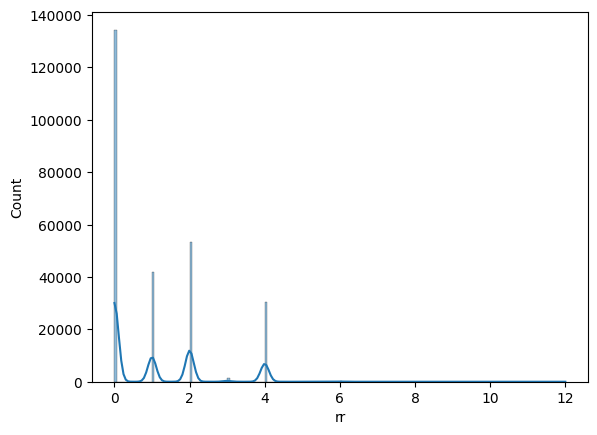


Column: A_frequency
count    262105.000000
mean          1.059613
std           1.352624
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          12.000000
Name: A_frequency, dtype: float64


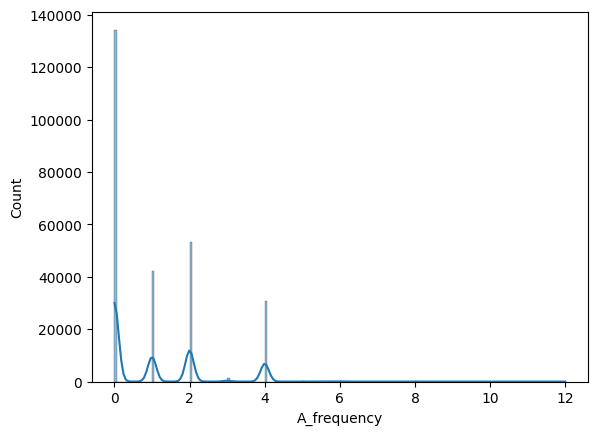


Column: PTR_frequency
count    262105.000000
mean          1.740028
std           2.424984
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          18.000000
Name: PTR_frequency, dtype: float64


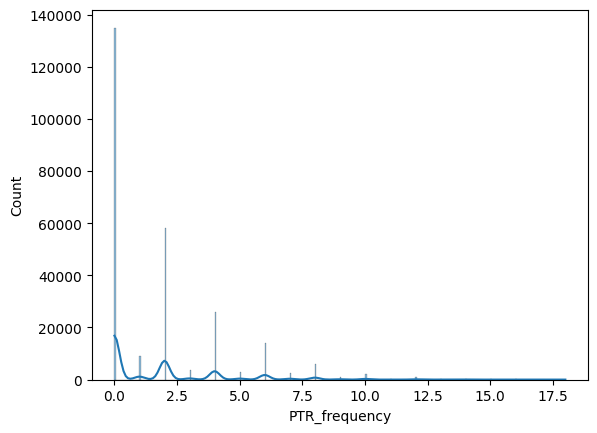


Column: TXT_frequency
count    262105.000000
mean          0.000019
std           0.004368
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TXT_frequency, dtype: float64


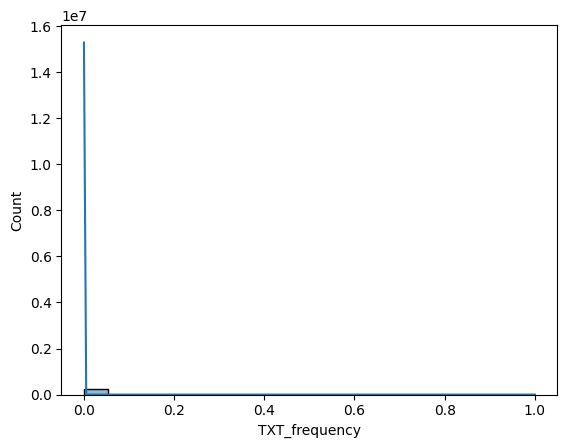


Column: AAAA_frequency
count    262105.000000
mean          0.000023
std           0.006766
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: AAAA_frequency, dtype: float64


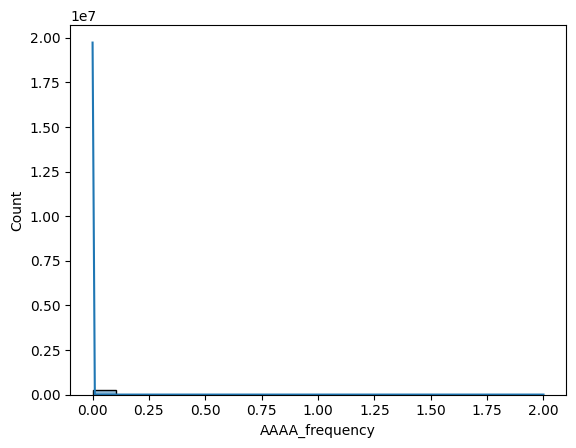


Column: rr_count
count    262105.000000
mean          0.398585
std           0.711441
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: rr_count, dtype: float64


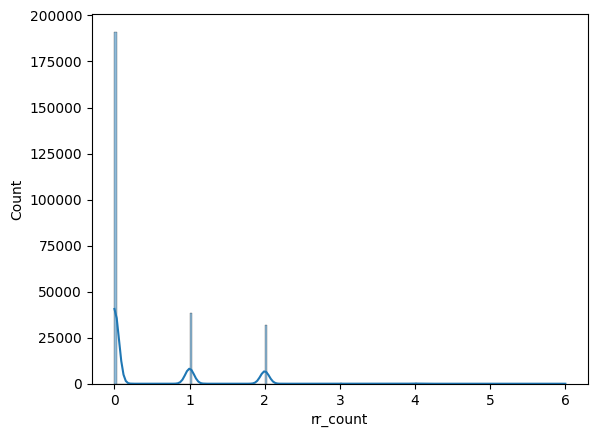


Column: rr_name_entropy
count    262105.000000
mean          2.879194
std           0.389698
min           0.693120
25%           2.621794
50%           3.102731
75%           3.200225
max           3.570534
Name: rr_name_entropy, dtype: float64


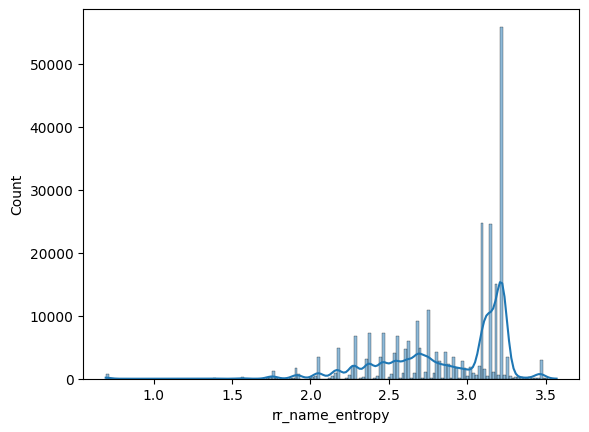


Column: rr_name_length
count    262105.000000
mean         20.052158
std           6.748880
min           2.000000
25%          14.000000
50%          24.000000
75%          26.000000
max          36.000000
Name: rr_name_length, dtype: float64


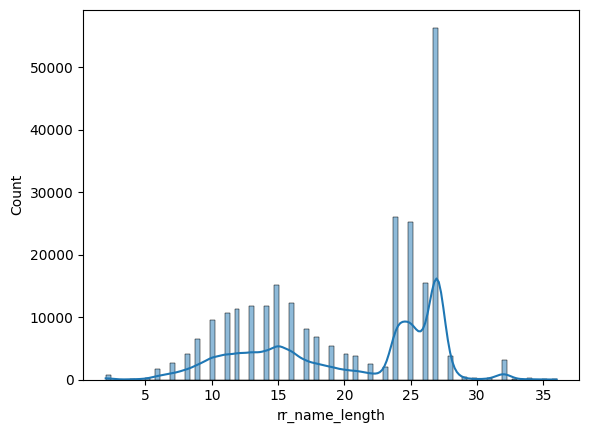


Column: distinct_ns
count    262105.000000
mean          0.257839
std           0.444972
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: distinct_ns, dtype: float64


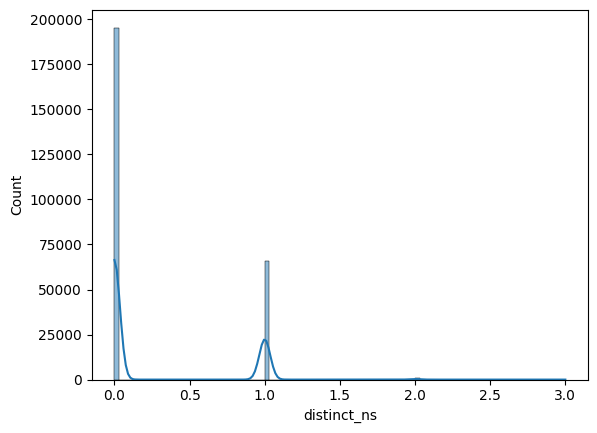


Column: ttl_mean
count    262105.000000
mean         66.921028
std          66.384995
min           1.000000
25%           1.000000
50%         122.000000
75%         125.000000
max         255.000000
Name: ttl_mean, dtype: float64


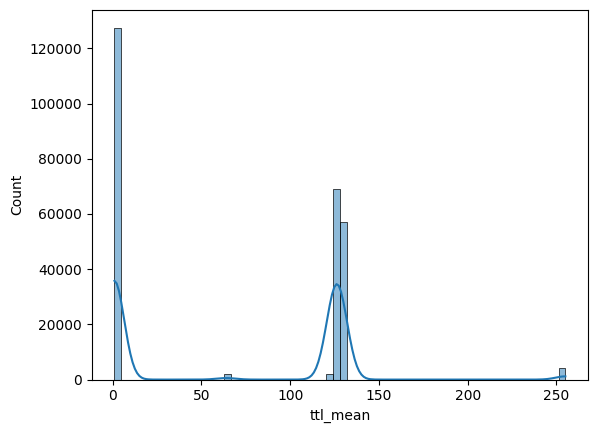


Column: ttl_variance
count    262105.000000
mean          2.385762
std           4.423527
min           0.000000
25%           0.000000
50%           0.000000
75%           9.000000
max        1003.102051
Name: ttl_variance, dtype: float64


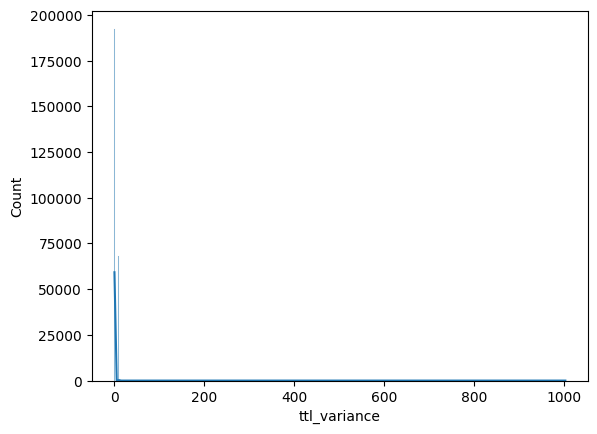

In [ ]:
# To know if we put 0, mean or drop the columns we need to see the distribution
import matplotlib.pyplot as plt
import seaborn as sns

for col in missing_counts[missing_counts > 0].index:
    print(f"\nColumn: {col}")
    print(df_all[col].describe())
    sns.histplot(df_all[col].dropna(), kde=True)
    plt.show()


In [ ]:
# we can distinguish 2 type :
# the one with lot of 0 already so we can still put 0 without issue :
count_cols = ['rr', 'A_frequency', 'PTR_frequency', 'TXT_frequency',
              'AAAA_frequency', 'rr_count', 'distinct_ns']
df_all[count_cols] = df_all[count_cols].fillna(0)

In [ ]:
# the one without 0 already and need maybe more different things
# first : rr_name_entropy
# due to the current distribution we will use the median

df_all['rr_name_entropy'] = df_all['rr_name_entropy'].fillna(0)


In [ ]:
## rr_name_length
# same !
df_all['rr_name_length'] = df_all['rr_name_length'].fillna(0)


In [ ]:
##ttl_mean
# also
df_all['ttl_mean'] = df_all['ttl_mean'].fillna(df_all['ttl_mean'].median())


In [ ]:
#ttl_variance
#we can deduce if it's missing that mean he has no variance
df_all['ttl_variance'] = df_all['ttl_variance'].fillna(0)


In [ ]:
# let do a end check of the missings values, things like that
df_all.dtypes
df_all.isna().sum().sort_values(ascending=False)


,0
rr,0
A_frequency,0
PTR_frequency,0
TXT_frequency,0
AAAA_frequency,0
rr_type,0
rr_count,0
rr_name_entropy,0
rr_name_length,0
distinct_ns,0


We cleaned categorical columns (rr_type, unique_country, unique_asn, unique_ttl) by standardizing missing and aberrant values, converted longest_word to numeric based on string length, dropped zero-variance and high-missing columns, imputed remaining nulls with 0 or median depending on distribution, and verified no missing values remain to ensure data quality for robust modeling.

# After the Pre-Preprocessing (Missing and bad writed values) ( Feature engennieiring / post Processing)



In [ ]:
# Now we have correct value we need to transform / encod the value (object) into readable values
df_all.dtypes

,0
rr,float32
A_frequency,float32
PTR_frequency,float32
TXT_frequency,float32
AAAA_frequency,float32
rr_type,object
rr_count,float32
rr_name_entropy,float32
rr_name_length,float32
distinct_ns,float32


In [ ]:
# we have 4 values to encode : rr_type, unique_country, , unique_asn , unique_ttl , the Globalclass need to be kept like that as it will be our label

In [ ]:
# Encode rr_type as numbers, keep it in the same column
print(df_all['rr_type'].value_counts()) # before
df_all['rr_type'] = pd.factorize(df_all['rr_type'])[0]

# Check result

# after
print(df_all['rr_type'].value_counts())


rr_type
{None}           502430
{'A'}            127700
{'PTR'}          127073
{'TXT'}               5
{'AAAA', 'A'}         3
Name: count, dtype: int64
rr_type
1    502430
2    127700
0    127073
4         5
3         3
Name: count, dtype: int64


In [ ]:
# unique_country,
print(df_all['unique_country'].value_counts())

unique_country
{}              690688
{'US'}           31509
{'DE'}            4901
{'JP'}            4707
{'CN'}            2985
                 ...  
{'KH'}               1
{'ZM'}               1
{'BM'}               1
{'US', 'DE'}         1
{'RU', 'KZ'}         1
Name: count, Length: 164, dtype: int64


In [ ]:
#  as we can see some have many country so we will keep the first one
def clean_country_keep_first(item):
    if isinstance(item, str):
        item = item.strip('{}').replace("'", "")
        countries = [c.strip() for c in item.split(',') if c.strip()]
        return countries[0] if countries else 'none'
    else:
        return 'none'

df_all['unique_country'] = df_all['unique_country'].apply(clean_country_keep_first)
print(df_all['unique_country'].value_counts())


unique_country
none    690695
US       31511
DE        4902
JP        4707
CN        2987
         ...  
ZW           1
ME           1
KH           1
ZM           1
BM           1
Name: count, Length: 149, dtype: int64


In [ ]:
#for later is better to encode them :
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_all['unique_country_encoded'] = le.fit_transform(df_all['unique_country'])
print(df_all['unique_country_encoded'].value_counts())
df_all.drop(columns=['unique_country'], inplace=True)

unique_country_encoded
148    690695
137     31511
33       4902
67       4707
25       2987
        ...  
147         1
84          1
70          1
146         1
15          1
Name: count, Length: 149, dtype: int64


In [ ]:
#we have yet : unique_asn ,
print(df_all['unique_asn'].value_counts())
#it's going to be the same as country just we have only 1 values each time here

unique_asn
{}              690688
{'AS13335'}      10208
{'AS15169'}       3079
{'AS16509'}       2722
{'AS24940'}       2191
                 ...  
{'AS21693'}          1
{'AS198561'}         1
{'AS32747'}          1
{'AS41039'}          1
{'AS45854'}          1
Name: count, Length: 5643, dtype: int64


In [ ]:

# Encode unique_asn
le_asn = LabelEncoder()
df_all['unique_asn_encoded'] = le_asn.fit_transform(df_all['unique_asn'])

# Optional: drop original column
df_all.drop(columns=['unique_asn'], inplace=True)


In [ ]:
# for unique_ttl
print(df_all['unique_ttl'].value_counts())


unique_ttl
[]            495106
[1]           127511
[128, 122]     69528
[128]          57256
[255]           4165
[64]            1965
[122]           1679
[64, 128]          1
Name: count, dtype: int64


In [ ]:
import ast  # to safely parse string lists

def ttl_set_to_mean(ttl_str):
    # Handle empty strings or sets
    if ttl_str in ('{}', '', '[]', None):
        return 0.0
    try:
        # Convert string representation of list to actual Python list
        ttl_list = ast.literal_eval(ttl_str)
        # Ensure all values are numeric
        ttl_list = [float(x) for x in ttl_list]
        # Keep only unique values
        unique_values = list(set(ttl_list))
        # Compute mean
        return float(sum(unique_values) / len(unique_values))
    except Exception as e:
        # If something unexpected happens, return 0
        return 0.0

# Apply function
df_all['unique_ttl_mean'] = df_all['unique_ttl'].apply(ttl_set_to_mean)

# Drop the original column
df_all.drop(columns=['unique_ttl'], inplace=True)

# Convert to float32
df_all['unique_ttl_mean'] = df_all['unique_ttl_mean'].astype('float32')


In [ ]:
print(df_all['unique_ttl_mean'].value_counts())
df_all['unique_ttl_mean'] = df_all['unique_ttl_mean'].astype('float32')


unique_ttl_mean
0.0      495106
1.0      127511
125.0     69528
128.0     57256
255.0      4165
64.0       1965
122.0      1679
96.0          1
Name: count, dtype: int64


In [ ]:
#now lets check the types
df_all.dtypes


,0
rr,float32
A_frequency,float32
PTR_frequency,float32
TXT_frequency,float32
AAAA_frequency,float32
rr_type,int64
rr_count,float32
rr_name_entropy,float32
rr_name_length,float32
distinct_ns,float32


In [ ]:
# We have only 1 object left  all the other are float, int64 or int 8
# then let convert everything as float
# Select all numeric columns except the label
numeric_cols = df_all.select_dtypes(include=['int8', 'int32', 'int64', 'float64']).columns

# Convert them to float32
df_all[numeric_cols] = df_all[numeric_cols].astype('float32')

# Verify types
print(df_all.dtypes)


rr                        float32
A_frequency               float32
PTR_frequency             float32
TXT_frequency             float32
AAAA_frequency            float32
rr_type                   float32
rr_count                  float32
rr_name_entropy           float32
rr_name_length            float32
distinct_ns               float32
ttl_mean                  float32
ttl_variance              float32
FQDN_count                float32
subdomain_length          float32
upper                     float32
lower                     float32
numeric                   float32
entropy                   float32
special                   float32
labels_max                float32
labels_average            float32
longest_word              float32
len                       float32
subdomain                 float32
GlobalClass                object
unique_country_encoded    float32
unique_asn_encoded        float32
unique_ttl_mean           float32
dtype: object


In [ ]:
# We can truely start now as we have all the preprocessing and feature engenieering done

In [ ]:
df_all['GlobalClass'] = df_all['GlobalClass'].astype(str)


## Preprocessing done


## Second analysis
We can now do a second analysis after the preprocessing

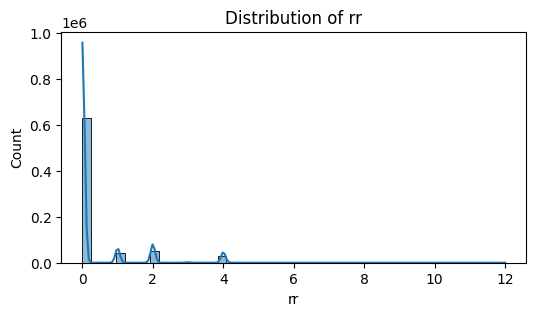

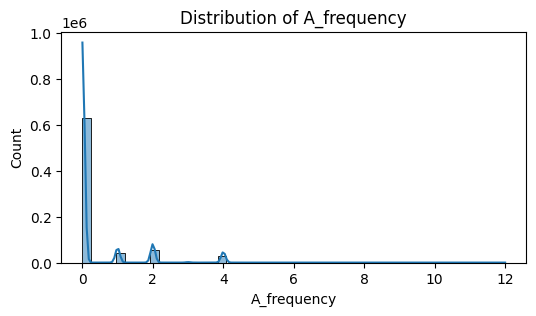

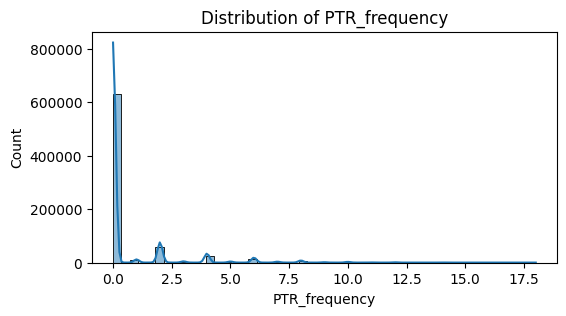

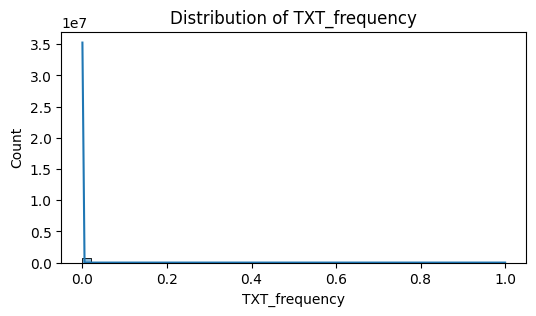

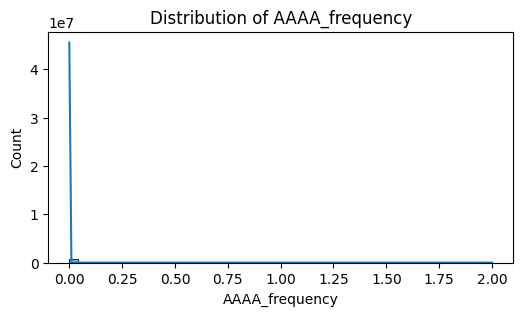

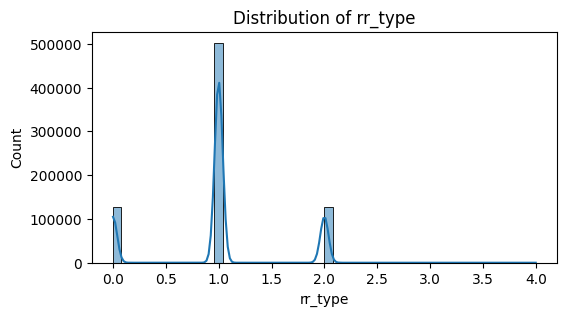

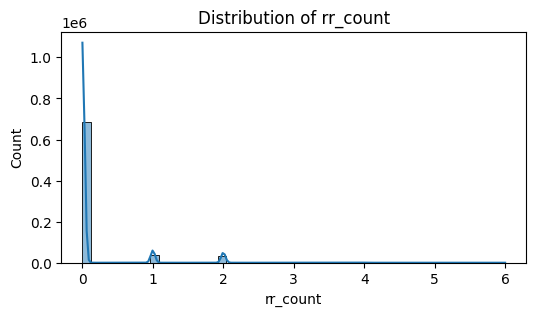

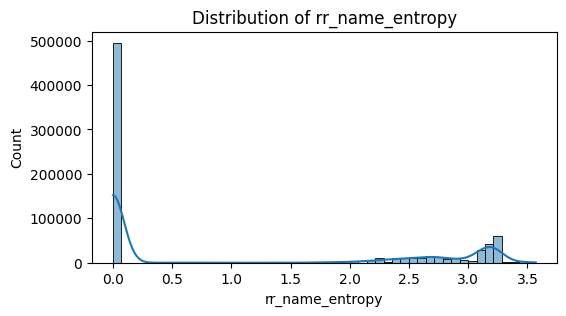

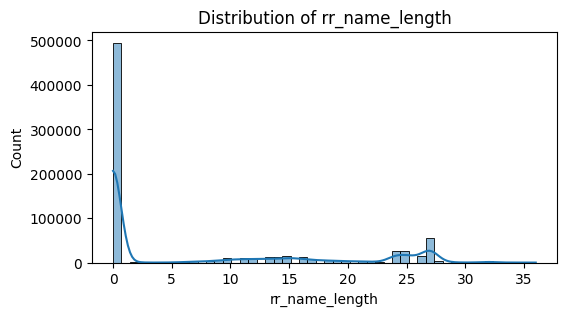

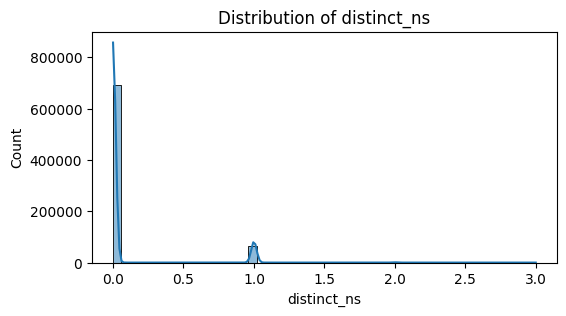

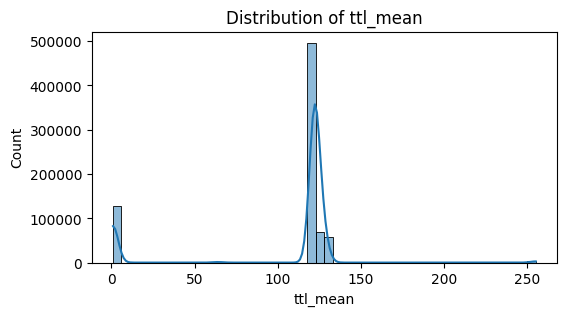

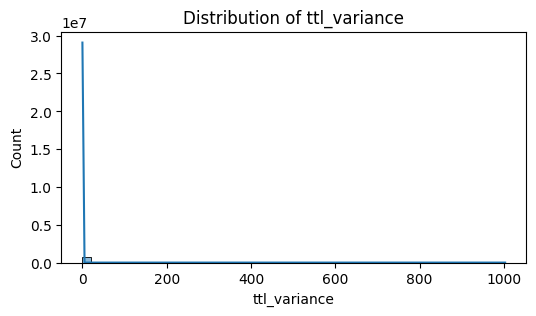

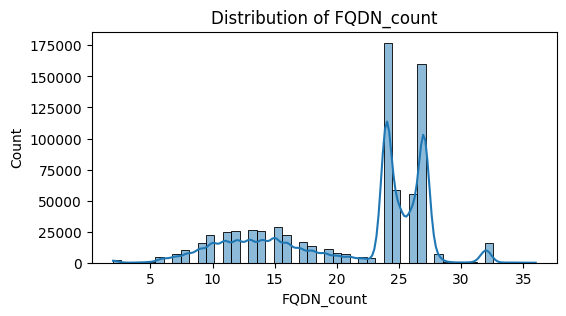

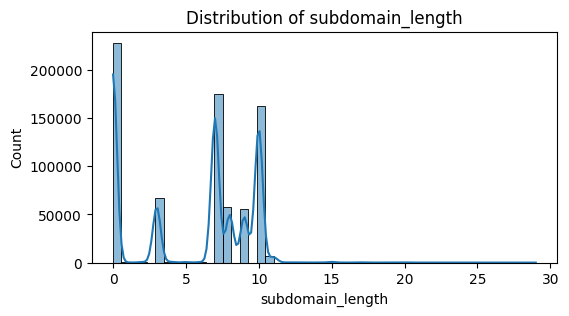

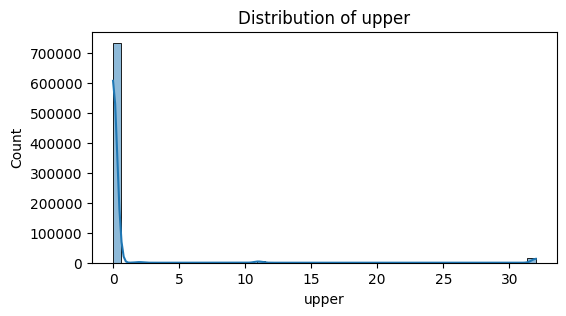

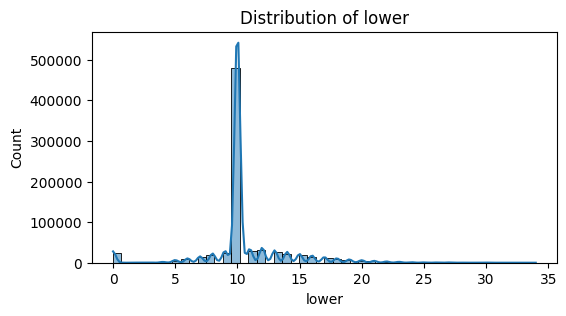

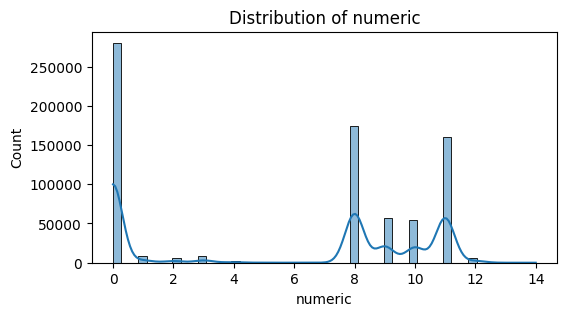

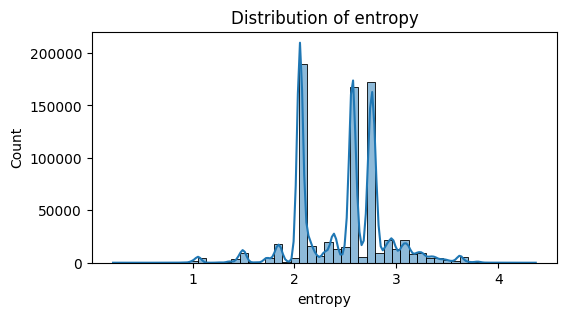

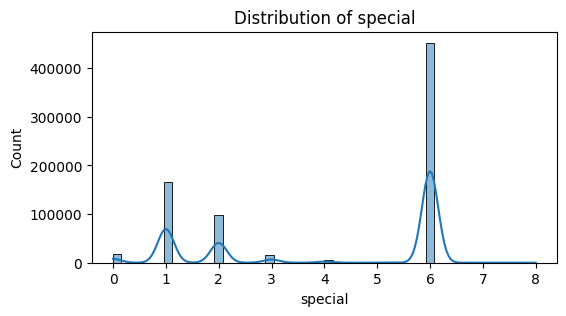

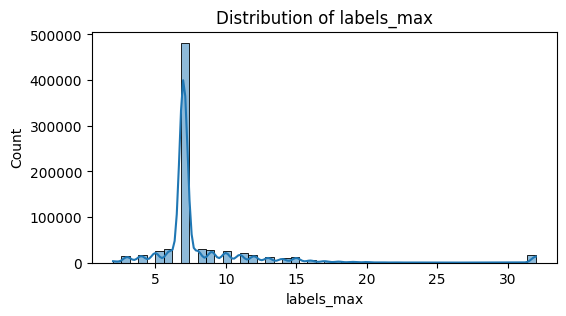

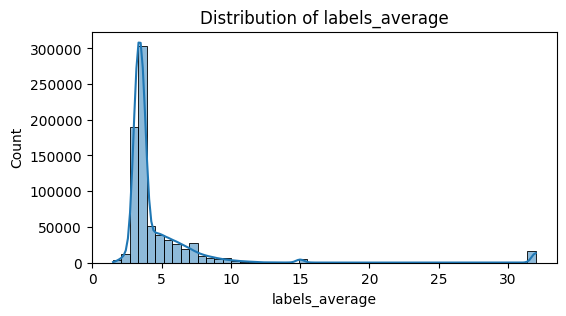

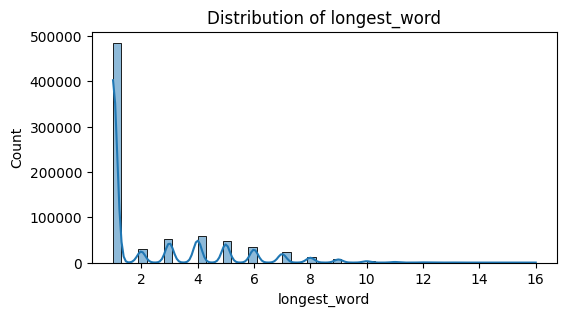

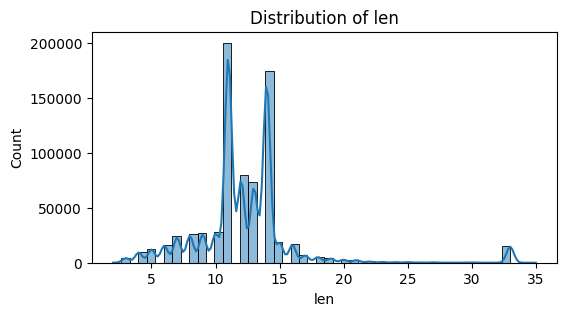

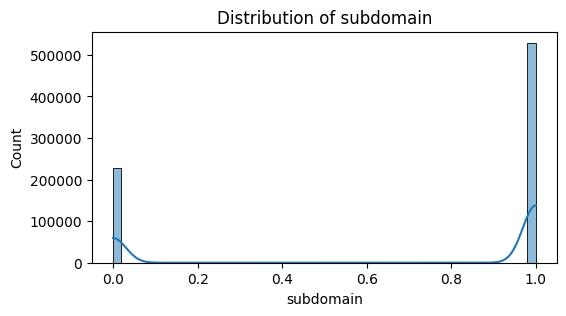

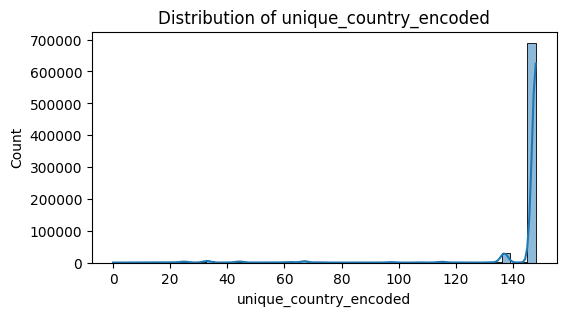

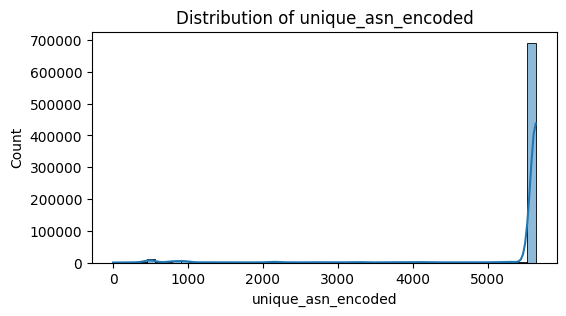

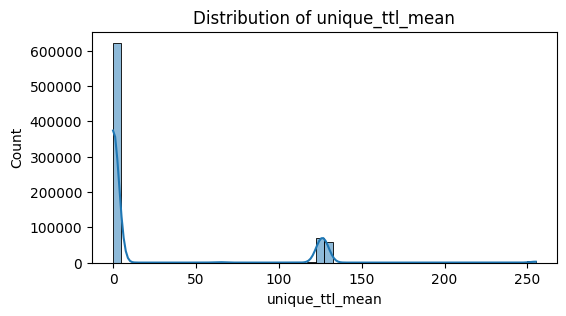

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_all.select_dtypes(include='float32').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_all[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


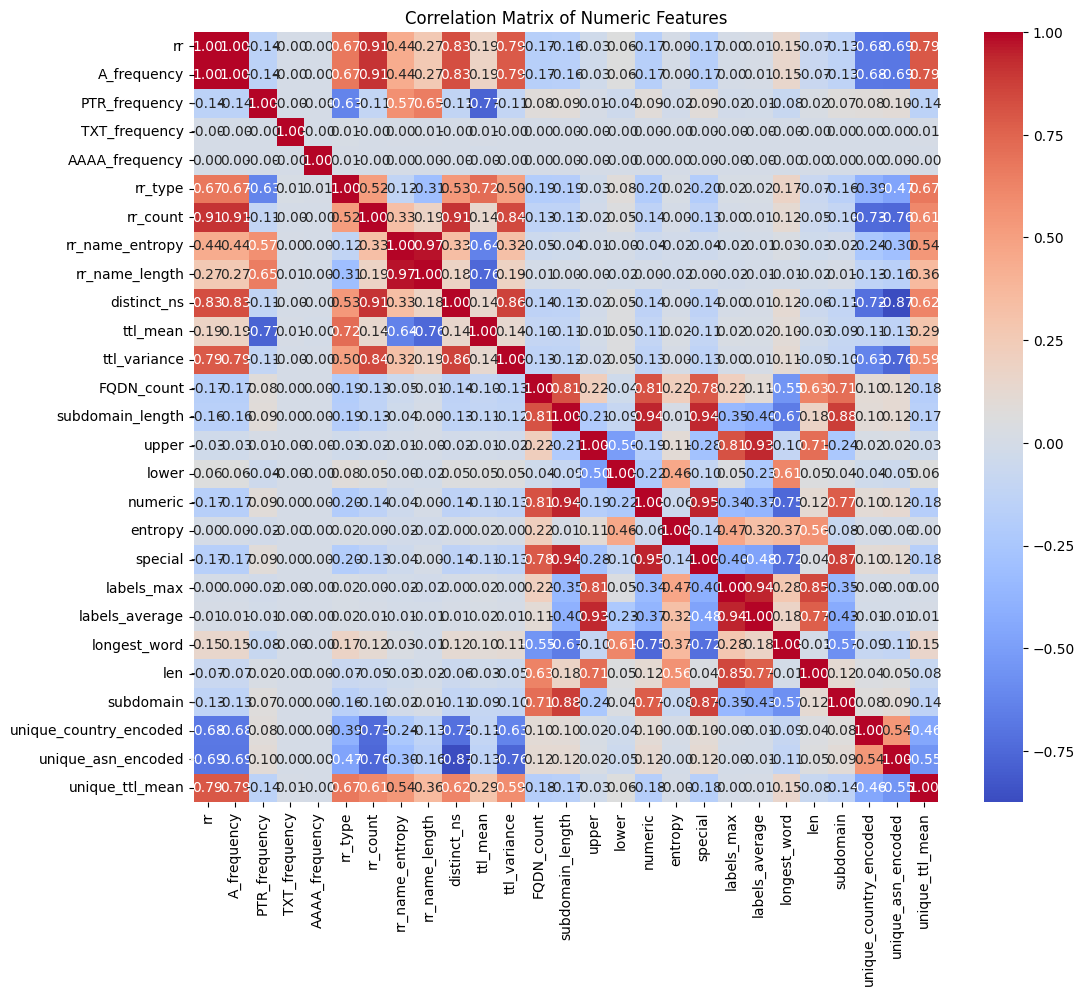

In [ ]:
# Select only numeric columns
numeric_cols = df_all.select_dtypes(include=['float32']).columns

# Compute correlation matrix
corr_matrix = df_all[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()
# the Correlatiom matrix is lot better no more "object" , but we still have lot of feature wo are not correled at all so we need to see if we keep them

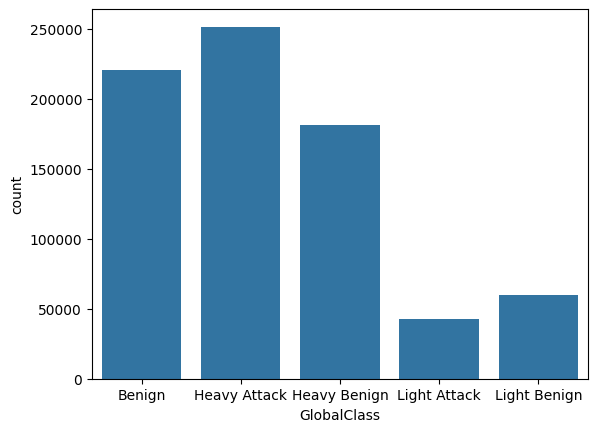

GlobalClass
Heavy Attack    251670
Benign          221073
Heavy Benign    181694
Light Benign     60091
Light Attack     42683
Name: count, dtype: int64
GlobalClass
Heavy Attack    33.236443
Benign          29.195693
Heavy Benign    23.995161
Light Benign     7.935833
Light Attack     5.636870
Name: count, dtype: float64


In [ ]:
#It's interesting as some feature have strong correlation but other not that much so it's nice then
# the Correlatiom matrix is lot better no more "object" , but we still have lot of feature wo are not correled at all so we need to see if we keep them
df_all['GlobalClass'].value_counts(normalize=True)
sns.countplot(x='GlobalClass', data=df_all)
plt.show()
class_counts = df_all['GlobalClass'].value_counts()
print(class_counts)
class_percentage = class_counts / class_counts.sum() * 100
print(class_percentage)

we have a bit of an imbalance, the Heavy Attack and the Benign are representing a big part

# 3. Formalisation of the problem.




For the formalisation of the problem, first we have tought if we needed to fuse all the class or if we keep them split between heavy and light, we think it's good to keep it like that as the light attack can in some cases be ignored as it don't impact much but if we fuse everything and we try to do some classification regression and we find it's an "attack" and don't have any precision on the type for decision maker, they can't be able to know what is the amount of thing to do,

So our goal here will be based on the dataset provided we will try to predict if it's a Benign or an attack and the weight of the DNS request " Heavy, Light".



By training an learning machine algorithm on this subject we will be able to test with new DNS data gathered in realt time and predict the best we can, and be able to guide decision maker about the choice or doing a dynamic firewall / cache system who can filter the attack and the Benign request

In [ ]:
df_all = df_all[df_all['GlobalClass'] != 'Benign'].copy()

print("Updated Class distribution:\n", df_all['GlobalClass'].value_counts())

# This distribution is a lot better more balanced 290k for attack vs 240k for Benign which is good because we have lot of information to be able to train our data well

Updated Class distribution:
 GlobalClass
Heavy Attack    251670
Heavy Benign    181694
Light Benign     60091
Light Attack     42683
Name: count, dtype: int64


#4. Selection of a baseline model and implementation of the model.


  We will start by implementing a Random Forest model, as it was identified as the best-performing model during the CIC dataset analysis. Then, we will analyze the results to understand the model's strengths and limitations. Finally, we will seek to further optimize classification and prediction performance through targeted adjustments and improvements.




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

X = df_all.drop(columns=['GlobalClass'])
y = df_all['GlobalClass']

# Encoding the target because it is an object type
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("RF model precision :", accuracy)

RF model precision : 0.6937367105606744


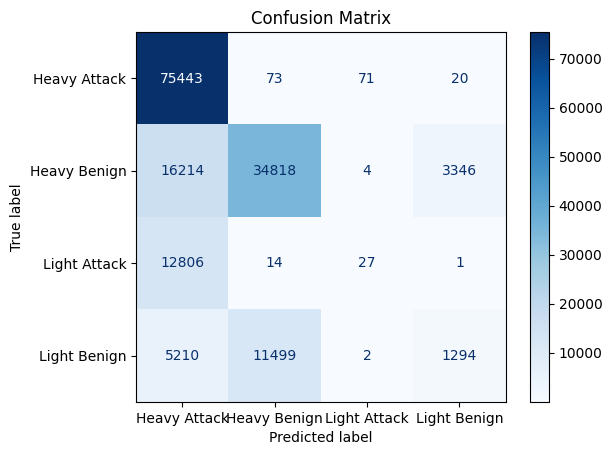

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


The model has high values on the diagonal (correct predictions). Here, "Heavy Attack" performs well (75,443/75,607 correct). Off-diagonal values reveal errors: 16,214 "Heavy Benign" samples misclassified as "Heavy Attack." Common confusions include "Light Attack" with "Heavy Attack" and "Light Benign" with "Heavy Benign" or "Heavy Attack."

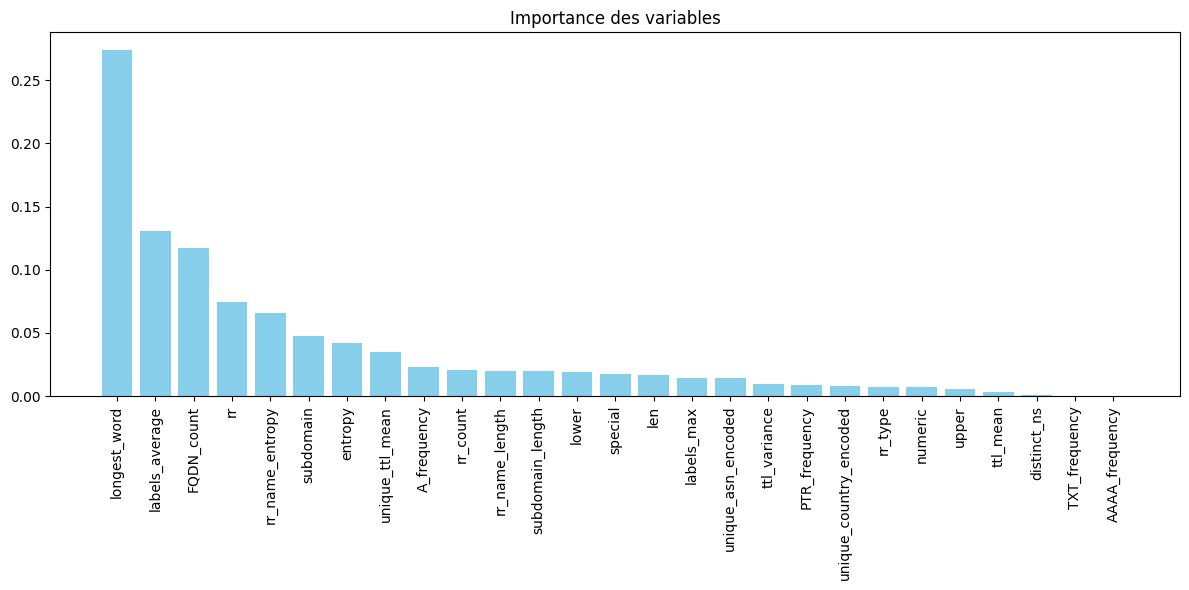

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(12,6))
plt.title("Importance des variables")
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
